<h1>Crime Rate Analysis and Prediction Across U.S. Cities and identifying Trends and High-Risk Areas and Victim and Criminal Factors</h1>
<h2>Phase 1</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import kagglehub
import os

/Users/jagritsharma/LearnEnv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
main_plots_folder = "Plots"
os.makedirs(main_plots_folder, exist_ok=True)

In [3]:
path = kagglehub.dataset_download("arpitsinghaiml/u-s-crime-dataset")
file_path = os.path.join(path, 'Crime_Data_from_2020_to_Present.csv')
df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None) 

In [4]:
df.head(15)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,1822 0100 0930 0929,41,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900,1,Central,182,2,354,THEFT OF IDENTITY,0930 0929,25,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620
7,220314085,07/22/2022 12:00:00 AM,05/12/2020 12:00:00 AM,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,0100,27,F,B,248.0,CELL PHONE STORE,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537
8,231309864,04/28/2023 12:00:00 AM,12/09/2020 12:00:00 AM,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,0100,24,F,B,750.0,CYBERSPACE,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521
9,211904005,12/31/2020 12:00:00 AM,12/31/2020 12:00:00 AM,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,0416,26,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535


In [5]:
df.shape

(982638, 28)

In [6]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns

['DR_NO',
 'TIME OCC',
 'AREA',
 'Rpt Dist No',
 'Part 1-2',
 'Crm Cd',
 'Vict Age',
 'Premis Cd',
 'Weapon Used Cd',
 'Crm Cd 1',
 'Crm Cd 2',
 'Crm Cd 3',
 'Crm Cd 4',
 'LAT',
 'LON']

In [7]:
string_columns = df.select_dtypes(include=['object']).columns.tolist()
string_columns

['Date Rptd',
 'DATE OCC',
 'AREA NAME',
 'Crm Cd Desc',
 'Mocodes',
 'Vict Sex',
 'Vict Descent',
 'Premis Desc',
 'Weapon Desc',
 'Status',
 'Status Desc',
 'LOCATION',
 'Cross Street']


**Data Preprocessing**


---


1. **Handling Missing values**

In [8]:
df_missing_values = df.isnull().sum()
print('Total missing values for each column for the dataset')
print(df_missing_values)

Total missing values for each column for the dataset
DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           145262
Vict Age               0
Vict Sex          138445
Vict Descent      138456
Premis Cd             14
Premis Desc          585
Weapon Used Cd    656471
Weapon Desc       656471
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          913763
Crm Cd 3          980327
Crm Cd 4          982574
LOCATION               0
Cross Street      830789
LAT                    0
LON                    0
dtype: int64


In [9]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']).columns:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print("Dataset after cleaning the dataset")
print(df.isnull().sum())

Dataset after cleaning the dataset
DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64


2. **Removing Duplicates**

In [10]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

Number of duplicate rows: 0


3. **Standardizing Text Data**

In [11]:
for col in string_columns:
    df[col] = df[col].apply(lambda x: x.lower())

4. **Data Type Conversion**

In [12]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format="%m/%d/%Y %I:%M:%S %p")
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format="%m/%d/%Y %I:%M:%S %p")

df['Vict Age'] = df['Vict Age'].astype(int)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,7,wilshire,784,1,510,vehicle - stolen,0344,0,m,o,101.0,street,363.840882,"strong-arm (hands, fist, feet or bodily force)",aa,adult arrest,510.0,998.000000,984.204673,991.21875,1900 s longwood av,broadway,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,1,central,182,1,330,burglary from vehicle,1822 1402 0344,47,m,o,128.0,bus stop/layover (also query 124),363.840882,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,330.0,998.000000,984.204673,991.21875,1000 s flower st,broadway,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,3,southwest,356,1,480,bike - stolen,0344 1251,19,x,x,502.0,"multi-unit dwelling (apartment, duplex, etc)",363.840882,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,480.0,958.167085,984.204673,991.21875,1400 w 37th st,broadway,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,9,van nuys,964,1,343,shoplifting-grand theft ($950.01 & over),0325 1501,19,m,o,405.0,clothing store,363.840882,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,343.0,958.167085,984.204673,991.21875,14000 riverside dr,broadway,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,1200,6,hollywood,666,2,354,theft of identity,1822 1501 0930 2004,28,m,h,102.0,sidewalk,363.840882,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,354.0,958.167085,984.204673,991.21875,1900 transient,broadway,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982633,242011172,2024-08-20,2024-08-17,2300,20,olympic,2033,1,341,"theft-grand ($950.01 & over)excpt,guns,fowl,li...",0344 1822,36,f,c,207.0,bar/cocktail/nightclub,363.840882,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,341.0,958.167085,984.204673,991.21875,3700 wilshire bl,broadway,34.0617,-118.3066
982634,240710284,2024-07-24,2024-07-23,1400,7,wilshire,788,1,510,vehicle - stolen,0344,0,m,h,101.0,street,363.840882,"strong-arm (hands, fist, feet or bodily force)",ic,invest cont,510.0,958.167085,984.204673,991.21875,4000 w 23rd st,broadway,34.0362,-118.3284
982635,240104953,2024-01-15,2024-01-15,100,1,central,101,2,745,vandalism - misdeameanor ($399 or under),0329 0400 0416,0,x,x,503.0,hotel,500.000000,unknown weapon/other weapon,ic,invest cont,745.0,958.167085,984.204673,991.21875,1300 w sunset bl,broadway,34.0685,-118.2460
982636,240309674,2024-04-24,2024-04-24,1500,3,southwest,358,1,230,"assault with deadly weapon, aggravated assault",1822 0334 0416 0445 0449 1202,70,f,w,102.0,sidewalk,308.000000,stick,ic,invest cont,230.0,958.167085,984.204673,991.21875,flower st,jefferson bl,34.0215,-118.2868


5. **Convert features with string datatype to categorical**

In [13]:
for col in string_columns:
    df[col] = df[col].astype("category").cat.codes

df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,60,60,2130,7,20,784,1,510,134,37961,0,3,12,101.0,266,363.840882,65,0,0,510.0,998.000000,984.204673,991.21875,21599,1610,34.0375,-118.3506
1,200106753,39,38,1800,1,1,182,1,330,21,268374,47,3,12,128.0,29,363.840882,65,3,2,330.0,998.000000,984.204673,991.21875,1856,1610,34.0444,-118.2628
2,200320258,315,308,1700,3,15,356,1,480,11,48902,19,4,18,502.0,207,363.840882,65,3,2,480.0,958.167085,984.204673,991.21875,13315,1610,34.0210,-118.3002
3,200907217,1225,69,2037,9,17,964,1,343,106,15487,19,3,12,405.0,40,363.840882,65,3,2,343.0,958.167085,984.204673,991.21875,13512,1610,34.1576,-118.4387
4,220614831,960,229,1200,6,6,666,2,354,116,269901,28,3,7,102.0,254,363.840882,65,3,2,354.0,958.167085,984.204673,991.21875,21439,1610,34.0944,-118.3277
5,231808869,1189,335,2300,18,14,1826,2,354,116,234500,41,3,7,501.0,255,363.840882,65,3,2,354.0,958.167085,984.204673,991.21875,57378,1610,33.9467,-118.2463
6,230110144,1189,184,900,1,1,182,2,354,116,162455,25,3,7,502.0,207,363.840882,65,3,2,354.0,958.167085,984.204673,991.21875,5232,1610,34.0415,-118.2620
7,220314085,933,132,1110,3,15,303,2,354,116,0,27,1,2,248.0,34,363.840882,65,3,2,354.0,958.167085,984.204673,991.21875,28959,1610,34.0335,-118.3537
8,231309864,1213,343,1400,13,9,1375,2,354,116,0,24,1,2,750.0,50,363.840882,65,3,2,354.0,958.167085,984.204673,991.21875,10721,1610,33.9911,-118.2521
9,211904005,365,365,1220,19,7,1974,2,624,4,83320,26,3,7,502.0,207,400.000000,65,3,2,624.0,958.167085,984.204673,991.21875,55581,1610,34.2336,-118.4535


6. **Data characteristics such as center, spread, including variance, standard deviation, and interquartile range, modality, shape**

In [14]:
eda_folder = os.path.join(main_plots_folder, "EDA_plots")
os.makedirs(eda_folder, exist_ok=True)

Column: DR_NO
  Mean: 219743659.49579805
  Median: 220814561.5
  Mode: 817
  Range: 249924465
  Variance: 167690711424662.62
  Standard Deviation: 12949544.834652012
  IQR (Interquartile Range): 20306481.5


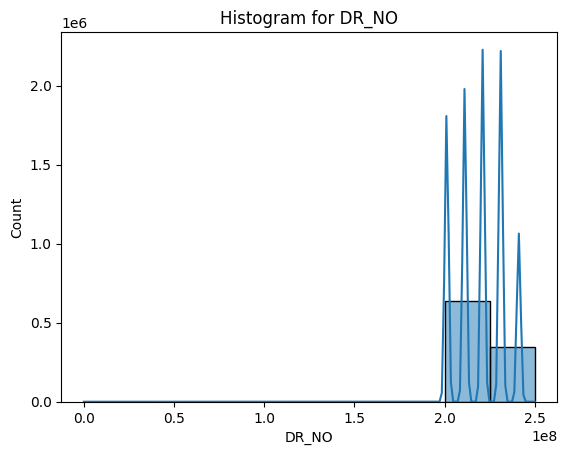

  Skewness: -0.0008617130137115377
  Kurtosis: -0.6282165058302112
Column: Date Rptd
  Mean: 855.4459862126236
  Median: 872.0
  Mode: 1128
  Range: 1734
  Variance: 220554.52976293815
  Standard Deviation: 469.63233466504215
  IQR (Interquartile Range): 788.0


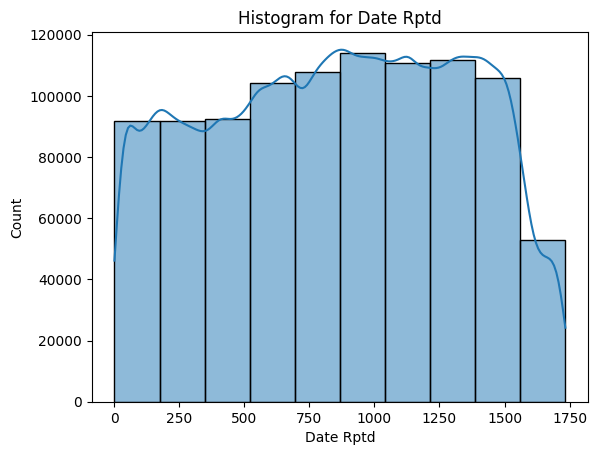

  Skewness: -0.07050793334482114
  Kurtosis: -1.1067321675170143
Column: DATE OCC
  Mean: 843.5865303397588
  Median: 858.0
  Mode: 0
  Range: 1734
  Variance: 220763.66097551625
  Standard Deviation: 469.85493609785163
  IQR (Interquartile Range): 790.0


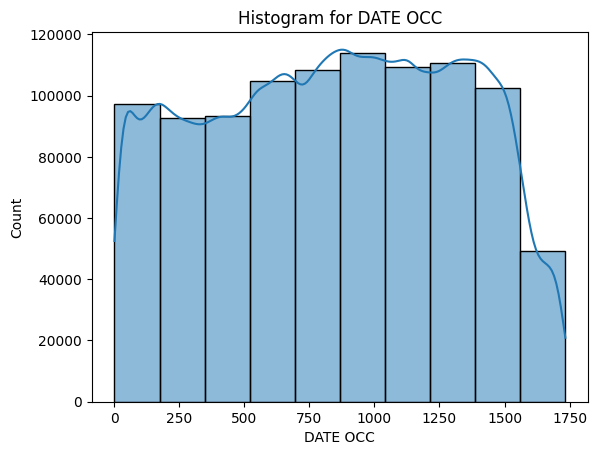

  Skewness: -0.05511830576876149
  Kurtosis: -1.1113052057678865
Column: TIME OCC
  Mean: 1338.9454264948029
  Median: 1420.0
  Mode: 1200
  Range: 2358
  Variance: 424501.5440935373
  Standard Deviation: 651.5378301323242
  IQR (Interquartile Range): 1000.0


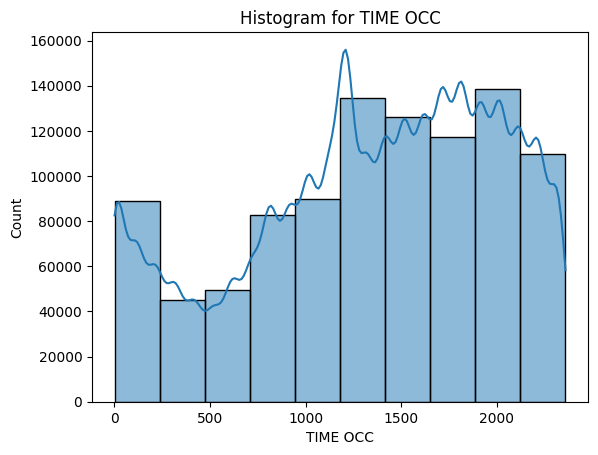

  Skewness: -0.4338705564224631
  Kurtosis: -0.783716086798496
Column: AREA
  Mean: 10.700277212971613
  Median: 11.0
  Mode: 1
  Range: 20
  Variance: 37.30532327246703
  Standard Deviation: 6.107808385375807
  IQR (Interquartile Range): 11.0


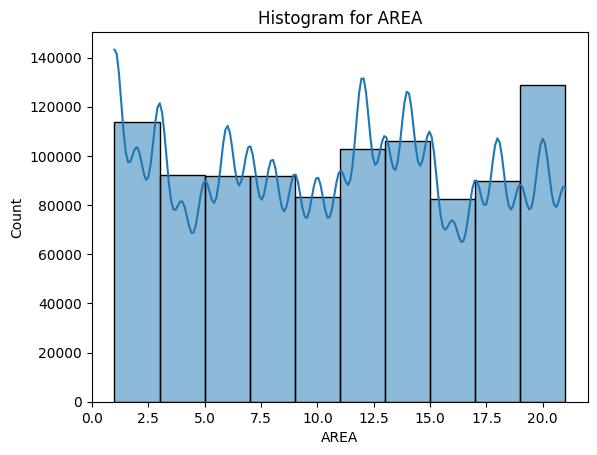

  Skewness: 0.010264254713900182
  Kurtosis: -1.1900736543912798
Column: AREA NAME
  Mean: 9.843350246988209
  Median: 10.0
  Mode: 1
  Range: 20
  Variance: 37.496724531560396
  Standard Deviation: 6.1234569102395415
  IQR (Interquartile Range): 10.0


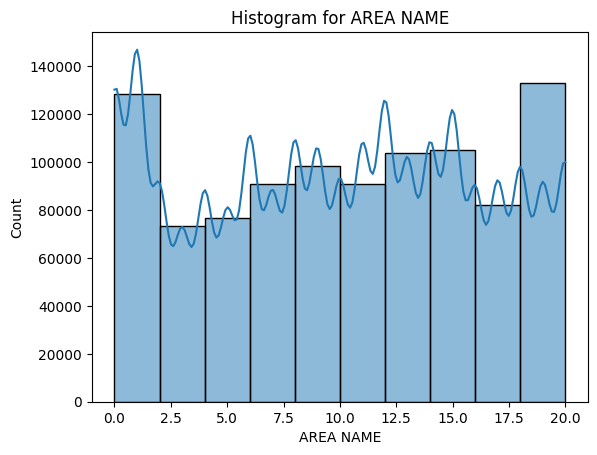

  Skewness: -0.03549088944106038
  Kurtosis: -1.1827428199717362
Column: Rpt Dist No
  Mean: 1116.459886550286
  Median: 1141.0
  Mode: 162
  Range: 2098
  Variance: 373191.21882276784
  Standard Deviation: 610.8937868588679
  IQR (Interquartile Range): 1030.0


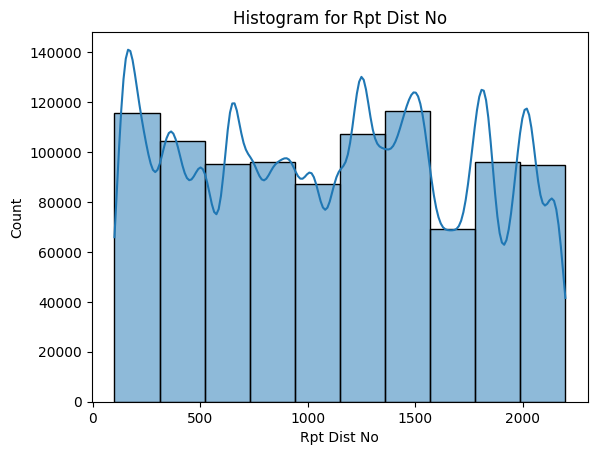

  Skewness: 0.016892834047780143
  Kurtosis: -1.192892615363815
Column: Part 1-2
  Mean: 1.4042526342355985
  Median: 1.0
  Mode: 1
  Range: 1
  Variance: 0.24083268703708108
  Standard Deviation: 0.49074707032959564
  IQR (Interquartile Range): 1.0


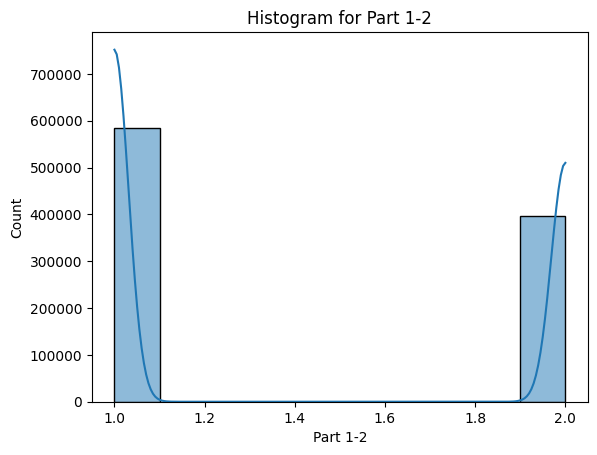

  Skewness: 0.39021144060503077
  Kurtosis: -1.8477387923971984
Column: Crm Cd
  Mean: 500.8235545541695
  Median: 442.0
  Mode: 510
  Range: 846
  Variance: 42523.364080057734
  Standard Deviation: 206.21193971266004
  IQR (Interquartile Range): 295.0


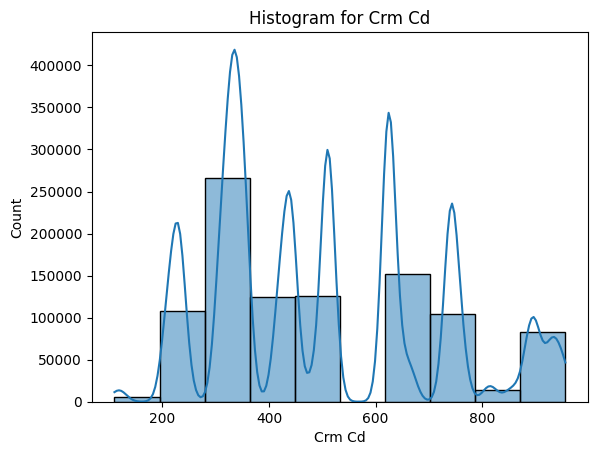

  Skewness: 0.5140801094228701
  Kurtosis: -0.7065046187373771
Column: Crm Cd Desc
  Mean: 80.1156397371158
  Median: 105.0
  Mode: 134
  Range: 139
  Variance: 2567.699196779067
  Standard Deviation: 50.67246981131931
  IQR (Interquartile Range): 102.0


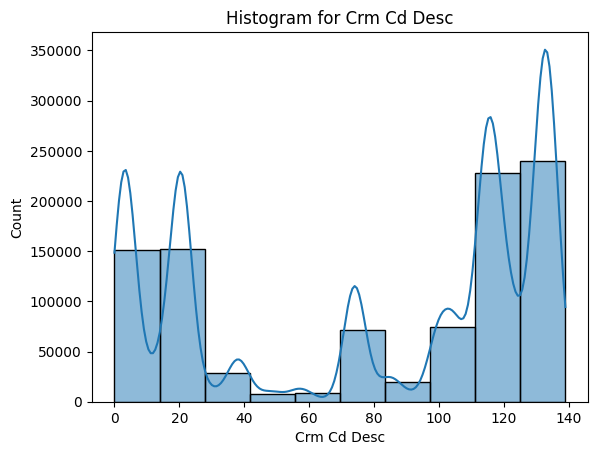

  Skewness: -0.43755351747452687
  Kurtosis: -1.5125763281360234
Column: Mocodes
  Mean: 123323.97411966564
  Median: 89382.0
  Mode: 37961
  Range: 309363
  Variance: 9041490598.95045
  Standard Deviation: 95086.75301507804
  IQR (Interquartile Range): 179770.0


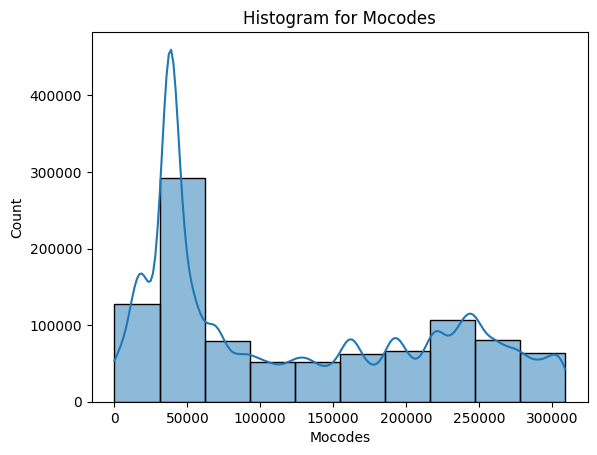

  Skewness: 0.4548439510302254
  Kurtosis: -1.2943732191422492
Column: Vict Age
  Mean: 29.079816778915532
  Median: 30.0
  Mode: 0
  Range: 124
  Variance: 482.68500869620493
  Standard Deviation: 21.970093506769718
  IQR (Interquartile Range): 44.0


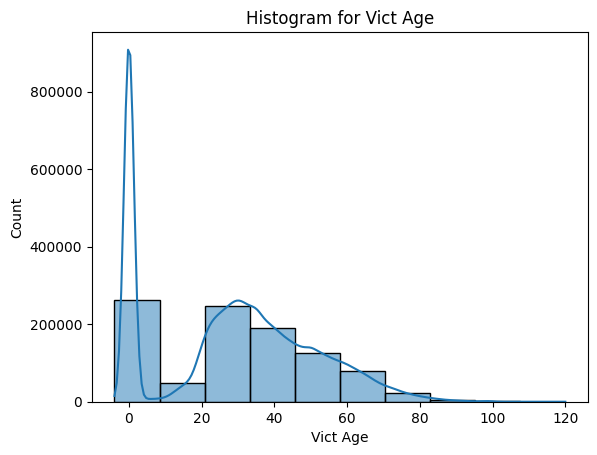

  Skewness: 0.15595544847924317
  Kurtosis: -0.7860875866949448
Column: Vict Sex
  Mean: 2.378149430410792
  Median: 3.0
  Mode: 3
  Range: 4
  Variance: 1.1455885765040763
  Standard Deviation: 1.0703217163563843
  IQR (Interquartile Range): 2.0


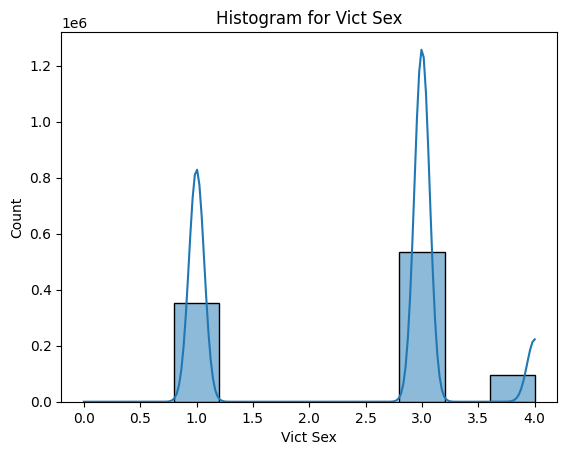

  Skewness: -0.32471694968368947
  Kurtosis: -1.4438270347741782
Column: Vict Descent
  Mean: 9.757114013502429
  Median: 7.0
  Mode: 7
  Range: 19
  Variance: 31.664245946864018
  Standard Deviation: 5.627099248001942
  IQR (Interquartile Range): 10.0


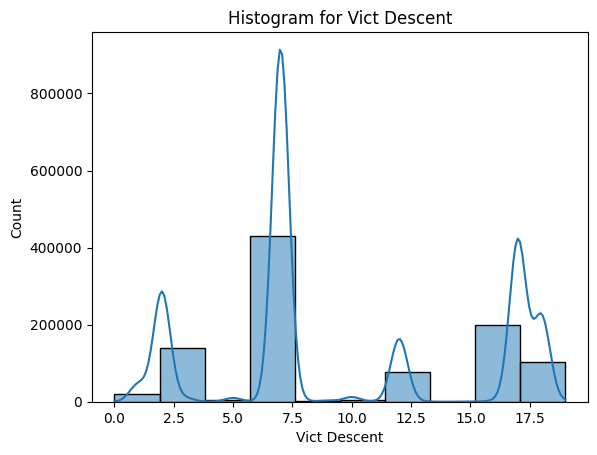

  Skewness: 0.2670238746104567
  Kurtosis: -1.3019086184082709
Column: Premis Cd
  Mean: 306.1330081496075
  Median: 203.0
  Mode: 101.0
  Range: 875.0
  Variance: 47983.88135723961
  Standard Deviation: 219.0522343123658
  IQR (Interquartile Range): 400.0


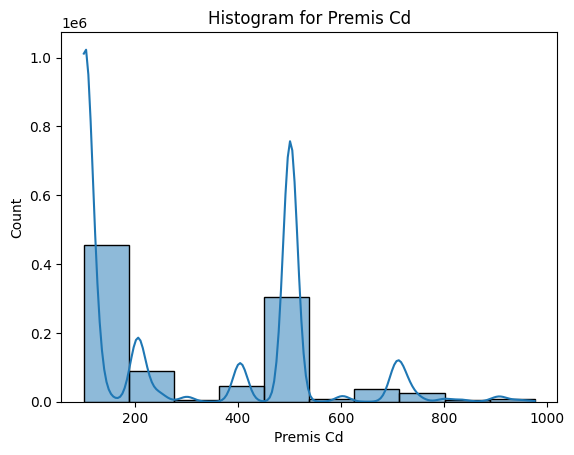

  Skewness: 0.5697291846439051
  Kurtosis: -0.9173777706320352
Column: Premis Desc
  Mean: 217.10060978712406
  Median: 254.0
  Mode: 266
  Range: 305
  Variance: 5160.379245249889
  Standard Deviation: 71.83577970099503
  IQR (Interquartile Range): 59.0


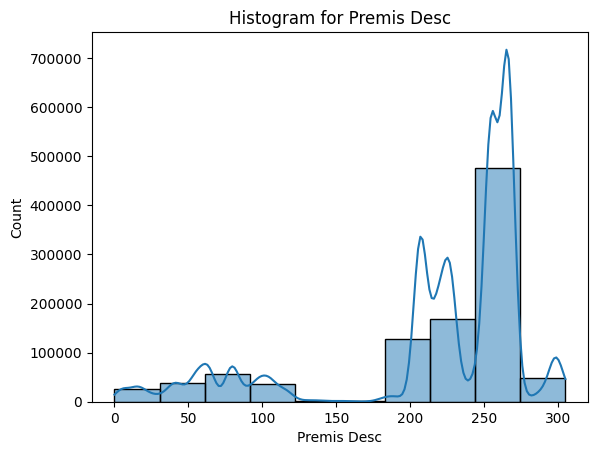

  Skewness: -1.5410061351789457
  Kurtosis: 1.2260672106288468
Column: Weapon Used Cd
  Mean: 363.8408821248013
  Median: 363.8408821248011
  Mode: 363.8408821248011
  Range: 415.0
  Variance: 5077.819708540788
  Standard Deviation: 71.25882196992025
  IQR (Interquartile Range): 0.0


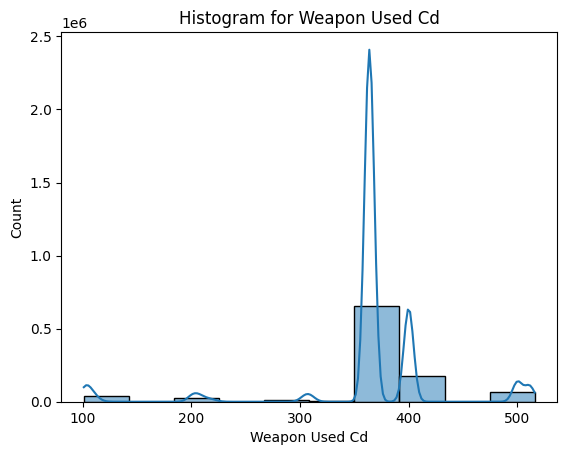

  Skewness: -1.7245066675516447
  Kurtosis: 5.899446593777222
Column: Weapon Desc
  Mean: 63.31465504081869
  Median: 65.0
  Mode: 65
  Range: 78
  Variance: 100.33079476817902
  Standard Deviation: 10.016526082838253
  IQR (Interquartile Range): 0.0


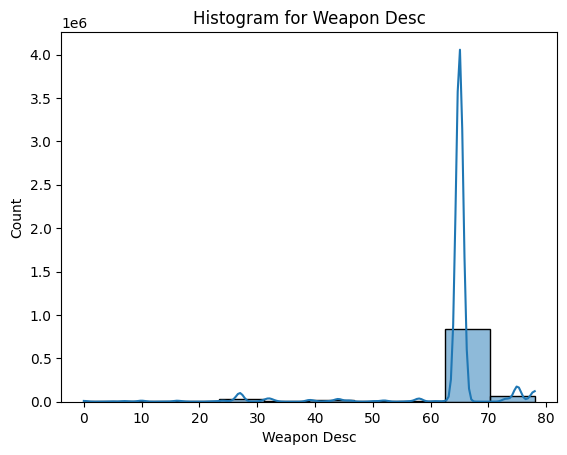

  Skewness: -3.42365307236126
  Kurtosis: 13.381374851273893
Column: Status
  Mean: 2.528244378906576
  Median: 3.0
  Mode: 3
  Range: 5
  Variance: 1.0056120474883672
  Standard Deviation: 1.0028020978679528
  IQR (Interquartile Range): 0.0


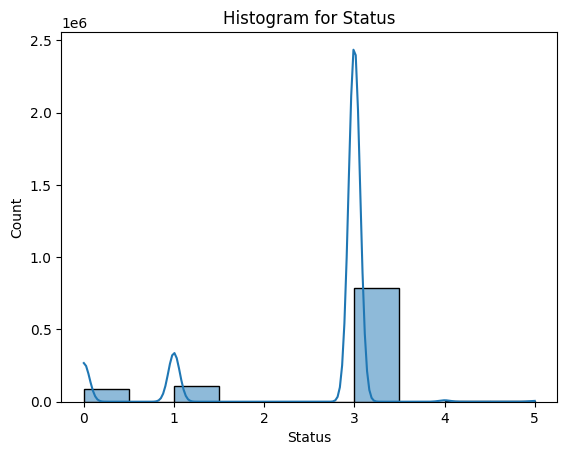

  Skewness: -1.654477990475576
  Kurtosis: 1.2143144210710228
Column: Status Desc
  Mean: 1.7243114961969719
  Median: 2.0
  Mode: 2
  Range: 5
  Variance: 0.39078666175073
  Standard Deviation: 0.6251293160224771
  IQR (Interquartile Range): 0.0


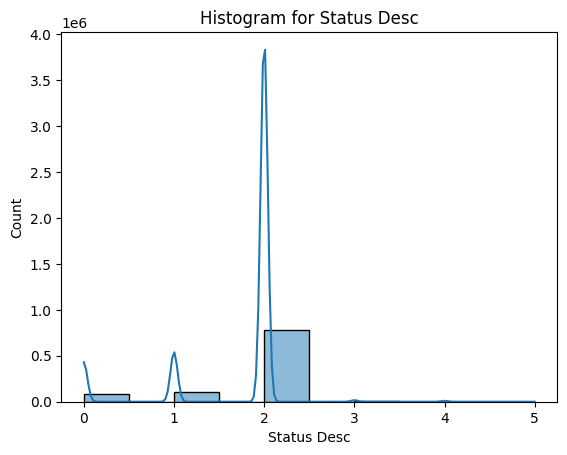

  Skewness: -1.8015574490889887
  Kurtosis: 2.633126610303733
Column: Crm Cd 1
  Mean: 500.57866820268515
  Median: 442.0
  Mode: 510.0
  Range: 846.0
  Variance: 42439.7935489707
  Standard Deviation: 206.00920743736359
  IQR (Interquartile Range): 295.0


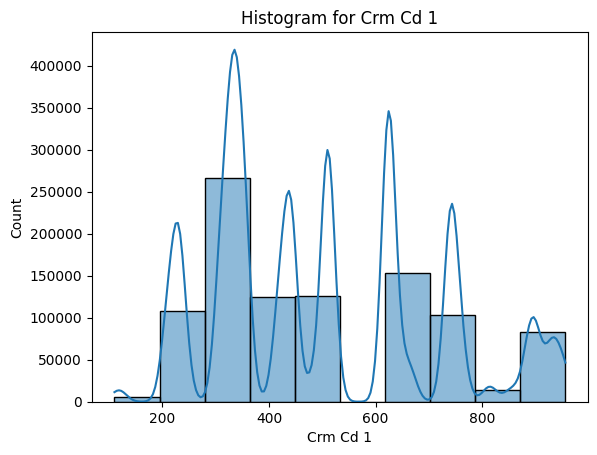

  Skewness: 0.51521007467341
  Kurtosis: -0.7016898343561082
Column: Crm Cd 2
  Mean: 958.1670852994552
  Median: 958.1670852994555
  Mode: 958.1670852994555
  Range: 789.0
  Variance: 851.6838742917005
  Standard Deviation: 29.18362339209613
  IQR (Interquartile Range): 0.0


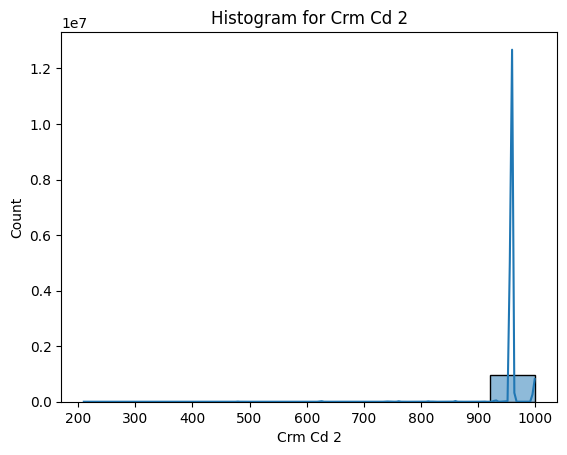

  Skewness: -13.938749634854032
  Kurtosis: 256.8041516569314
Column: Crm Cd 3
  Mean: 984.2046733016008
  Median: 984.204673301601
  Mode: 984.204673301601
  Range: 689.0
  Variance: 6.231479365755966
  Standard Deviation: 2.496293124966691
  IQR (Interquartile Range): 0.0


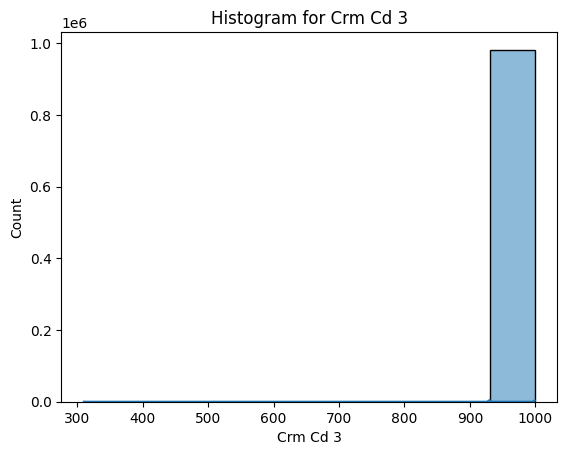

  Skewness: -108.90748006848612
  Kurtosis: 16387.641870063446
Column: Crm Cd 4
  Mean: 991.21875
  Median: 991.21875
  Mode: 991.21875
  Range: 178.0
  Variance: 0.04698066274728104
  Standard Deviation: 0.2167502312508133
  IQR (Interquartile Range): 0.0


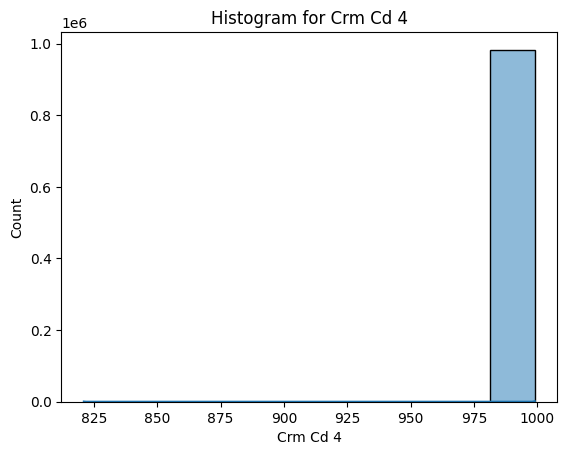

  Skewness: -585.956773947496
  Kurtosis: 417531.2897619196
Column: LOCATION
  Mean: 33785.0039129364
  Median: 35495.0
  Mode: 51778
  Range: 66264
  Variance: 359837024.05062485
  Standard Deviation: 18969.370681459754
  IQR (Interquartile Range): 32310.0


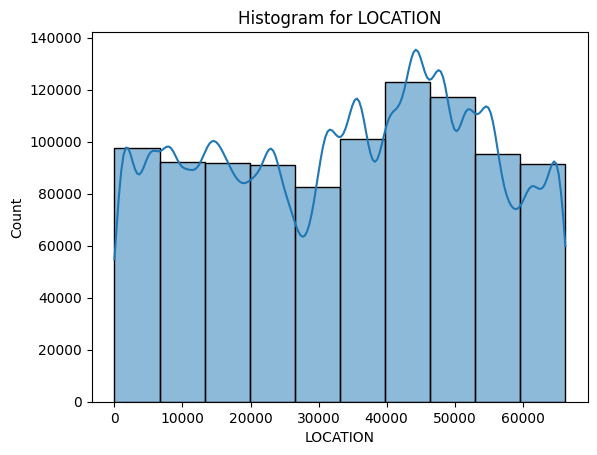

  Skewness: -0.10562745462852438
  Kurtosis: -1.164219202354954
Column: Cross Street
  Mean: 2160.6952560352847
  Median: 1610.0
  Mode: 1610
  Range: 10325
  Variance: 3238593.5402417253
  Standard Deviation: 1799.6092743264371
  IQR (Interquartile Range): 0.0


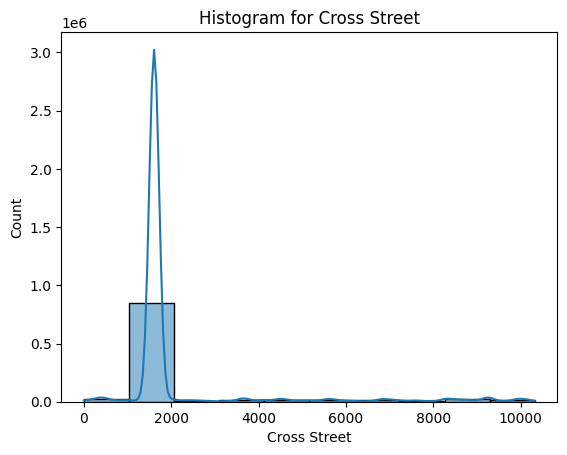

  Skewness: 3.1197201248566797
  Kurtosis: 8.828325502619274
Column: LAT
  Mean: 33.995724503021435
  Median: 34.0589
  Mode: 34.1016
  Range: 34.3343
  Variance: 2.6788816288003474
  Standard Deviation: 1.6367289417616917
  IQR (Interquartile Range): 0.15030000000000143


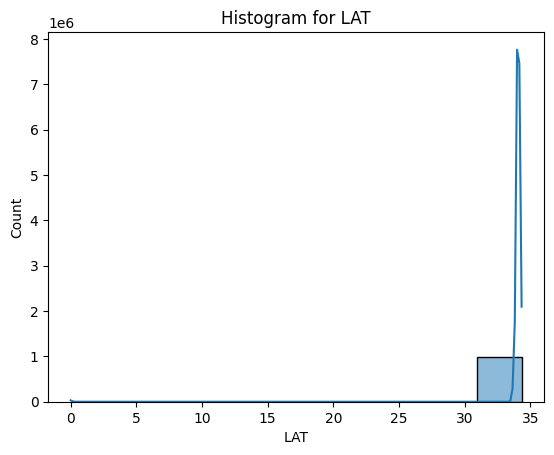

  Skewness: -20.626676573293715
  Kurtosis: 425.4423706281835
Column: LON
  Mean: -118.08222539185334
  Median: -118.3225
  Mode: -118.2739
  Range: 118.6676
  Variance: 32.182246316313666
  Standard Deviation: 5.672939830133373
  IQR (Interquartile Range): 0.1565999999999974


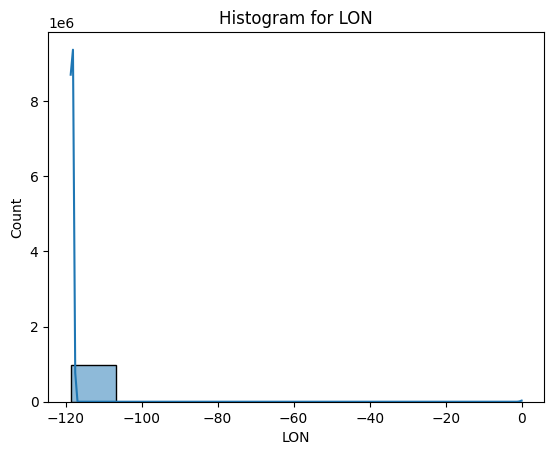

  Skewness: 20.759935497678995
  Kurtosis: 429.1231664196004


In [15]:
save_folder = os.path.join(eda_folder, "statistical_analysis")
os.makedirs(save_folder, exist_ok=True)

for col in df.columns:
    print(f"Column: {col}")

    # 1. Center
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]

    print(f"  Mean: {mean}")
    print(f"  Median: {median}")
    print(f"  Mode: {mode}")

    # 2. Spread
    data_range = df[col].max() - df[col].min()
    variance = df[col].var()
    std_dev = df[col].std()
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

    print(f"  Range: {data_range}")
    print(f"  Variance: {variance}")
    print(f"  Standard Deviation: {std_dev}")
    print(f"  IQR (Interquartile Range): {iqr}")

    # 3. Modality - using a histogram plot
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Histogram for {col}")
    plt.savefig(os.path.join(save_folder, f"histogram_{col}.png"))
    plt.show()

    # 4. Shape
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()

    print(f"  Skewness: {skewness}")
    print(f"  Kurtosis: {kurtosis}")

**Exploratory Data Analysis (EDA)**

---



**Maximize Insight into a Dataset**
 **Uncover Underlying Structure**

**Extract Important Variables**

In [16]:
# Get summary statistics for numeric columns
print(df.describe())

# Check the distribution of categorical features
for col in string_columns:
    print(df[col].value_counts())

              DR_NO      Date Rptd       DATE OCC       TIME OCC  \
count  9.826380e+05  982638.000000  982638.000000  982638.000000   
mean   2.197437e+08     855.445986     843.586530    1338.945426   
std    1.294954e+07     469.632335     469.854936     651.537830   
min    8.170000e+02       0.000000       0.000000       1.000000   
25%    2.106089e+08     465.000000     451.000000     900.000000   
50%    2.208146e+08     872.000000     858.000000    1420.000000   
75%    2.309153e+08    1253.000000    1241.000000    1900.000000   
max    2.499253e+08    1734.000000    1734.000000    2359.000000   

                AREA      AREA NAME    Rpt Dist No       Part 1-2  \
count  982638.000000  982638.000000  982638.000000  982638.000000   
mean       10.700277       9.843350    1116.459887       1.404253   
std         6.107808       6.123457     610.893787       0.490747   
min         1.000000       0.000000     101.000000       1.000000   
25%         5.000000       5.000000     58

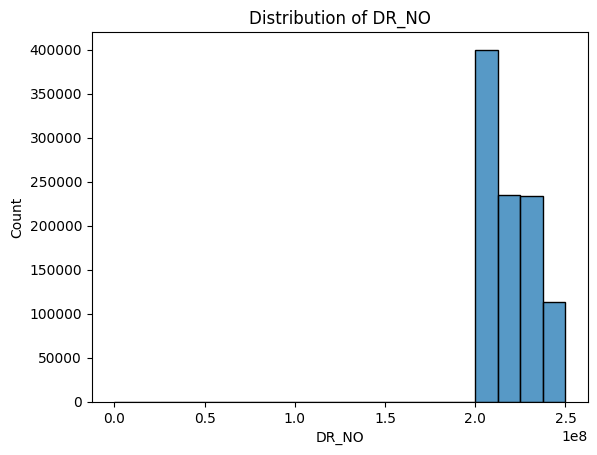

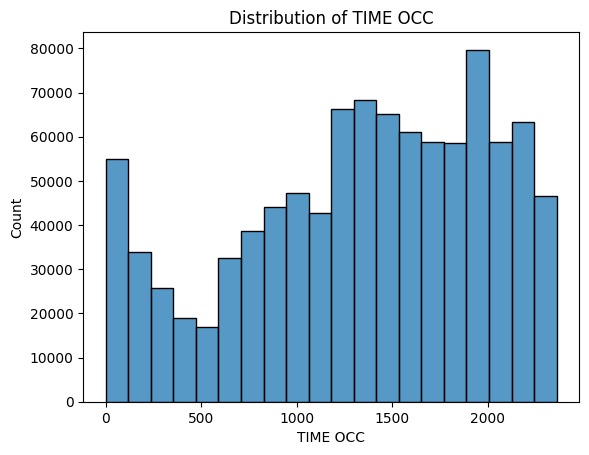

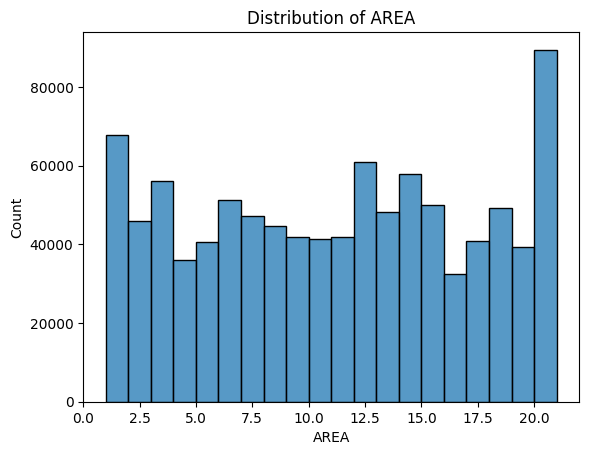

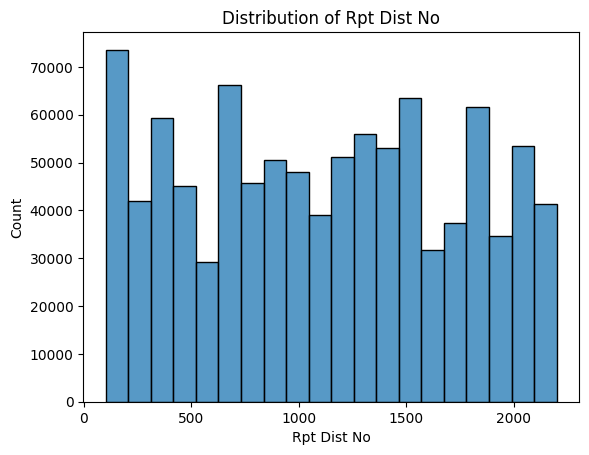

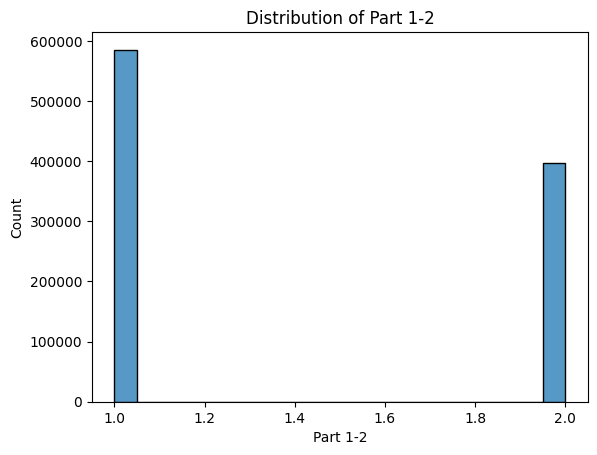

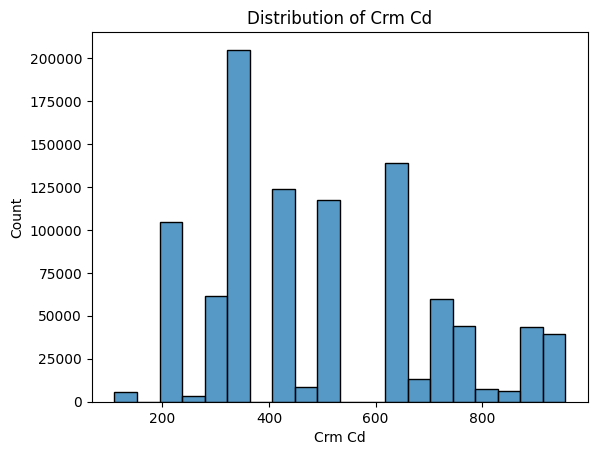

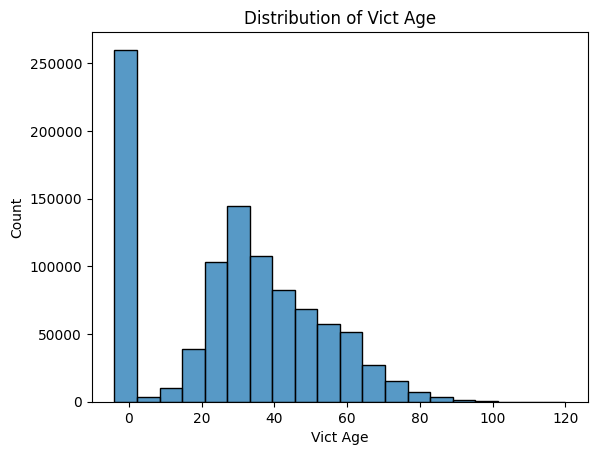

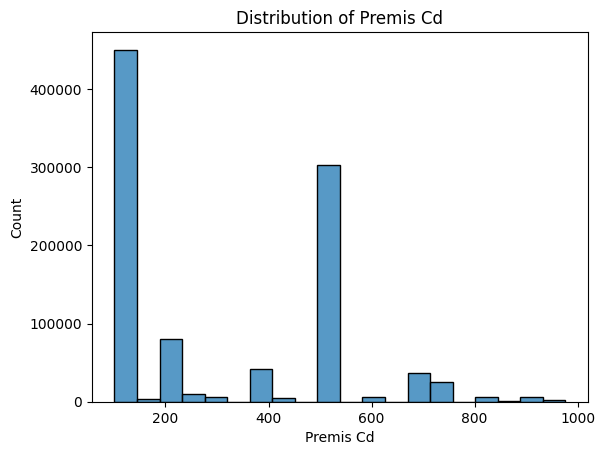

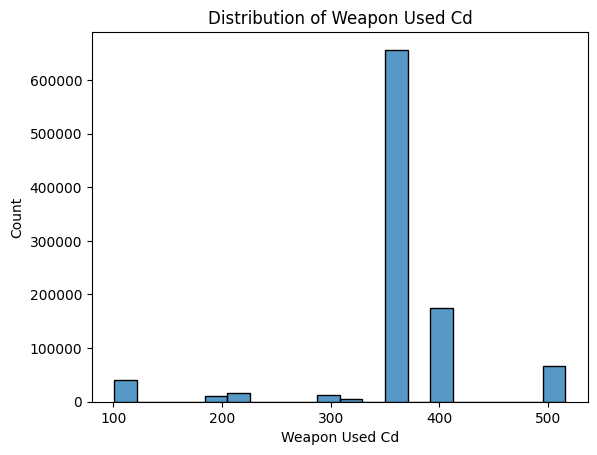

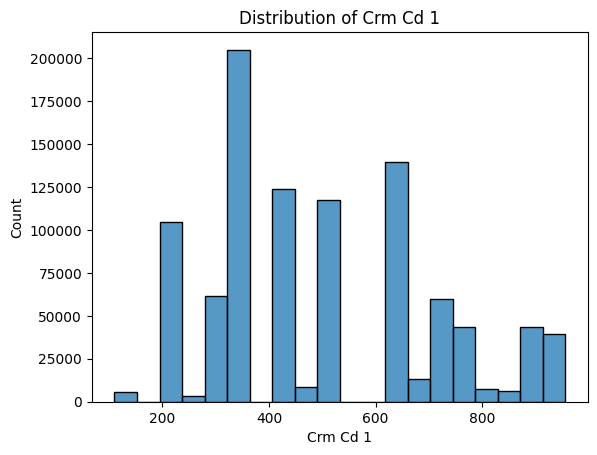

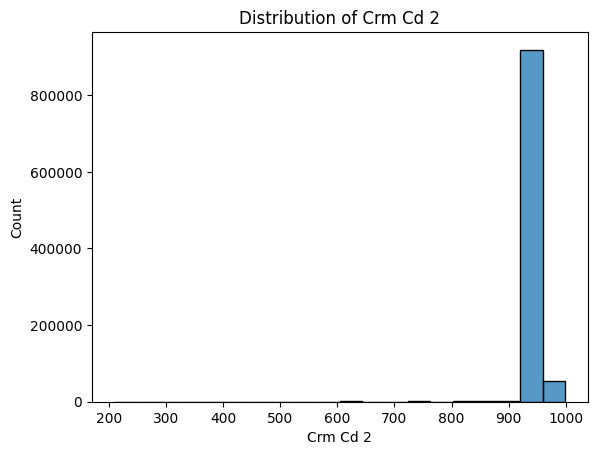

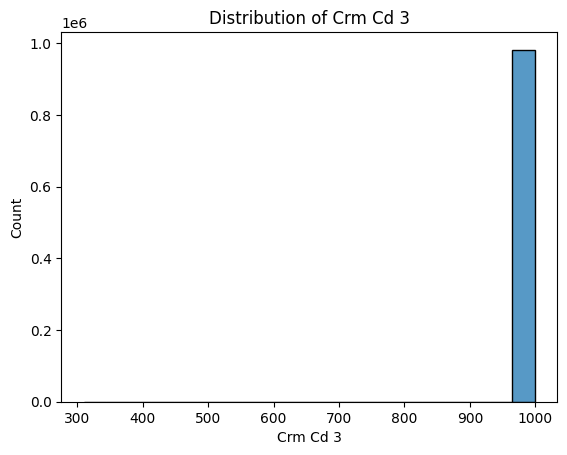

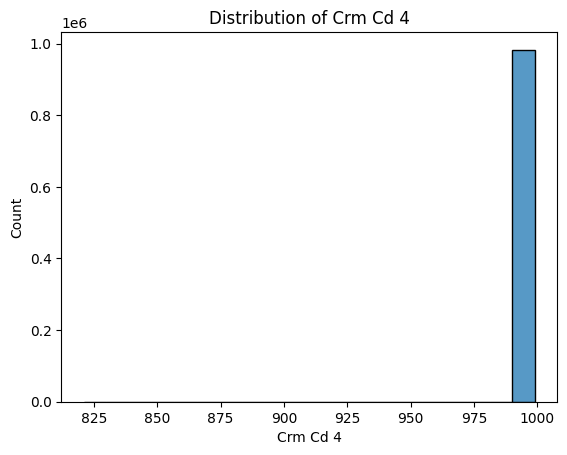

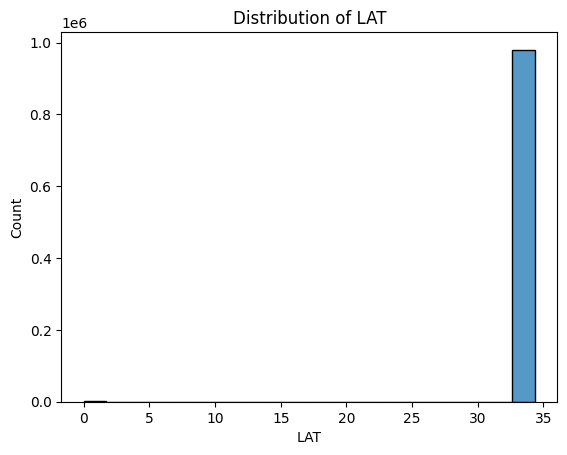

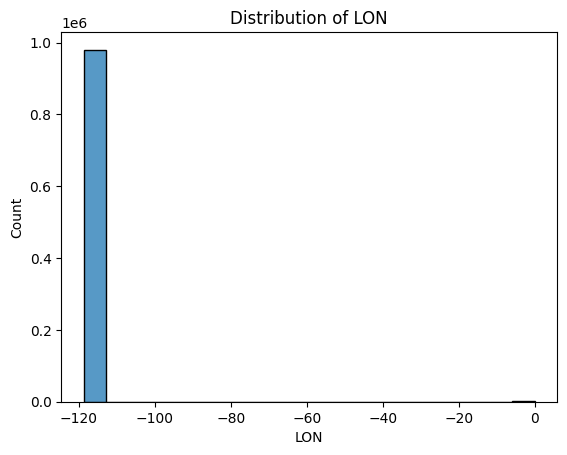

In [17]:
save_folder = os.path.join(eda_folder, "column_histograms")
os.makedirs(save_folder, exist_ok=True)

# Visualize distribution of a numerical column
for col in numeric_columns:
    sns.histplot(df[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.savefig(os.path.join(save_folder, f'distribution_{col}.png'))
    plt.show()

Correlation matrix:                      DR_NO  Date Rptd  DATE OCC  TIME OCC      AREA  AREA NAME  \
DR_NO           1.000000   0.972954  0.962634 -0.004952  0.036684   0.004827   
Date Rptd       0.972954   1.000000  0.989878 -0.005208 -0.012216   0.002609   
DATE OCC        0.962634   0.989878  1.000000  0.000530 -0.014329   0.001273   
TIME OCC       -0.004952  -0.005208  0.000530  1.000000  0.001061   0.010618   
AREA            0.036684  -0.012216 -0.014329  0.001061  1.000000   0.050323   
AREA NAME       0.004827   0.002609  0.001273  0.010618  0.050323   1.000000   
Rpt Dist No     0.036909  -0.011936 -0.014050  0.001184  0.999050   0.046699   
Part 1-2       -0.027919  -0.030546 -0.042607 -0.056143  0.007005  -0.010764   
Crm Cd         -0.018565  -0.018837 -0.017568  0.011562 -0.006050  -0.008111   
Crm Cd Desc     0.065972   0.065494  0.059438 -0.006708  0.018309   0.018723   
Mocodes        -0.014190  -0.013137 -0.014526 -0.031615 -0.025319   0.020054   
Vict Age       -0.

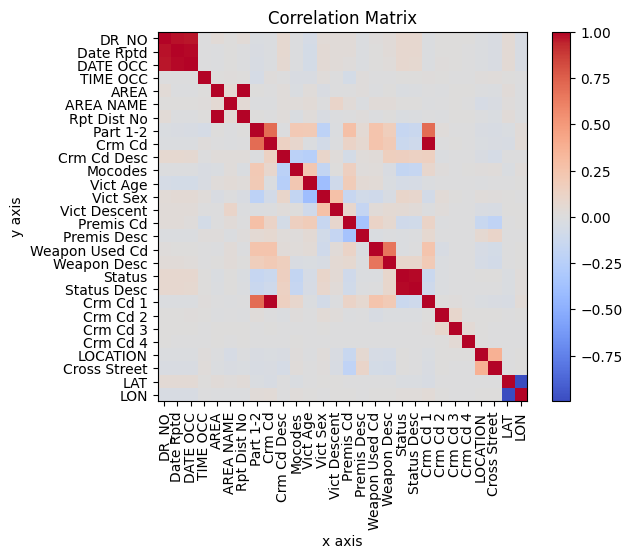

In [18]:
# Calculate correlation matrix for numerical features
corr_matrix = df.corr()
print("Correlation matrix:  ",corr_matrix)

plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Matrix")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.xticks(np.arange(len(df.columns)), df.columns, rotation=90)
plt.yticks(np.arange(len(df.columns)), df.columns)
plt.savefig(os.path.join(eda_folder, "correlation_matrix.png"))
plt.show()

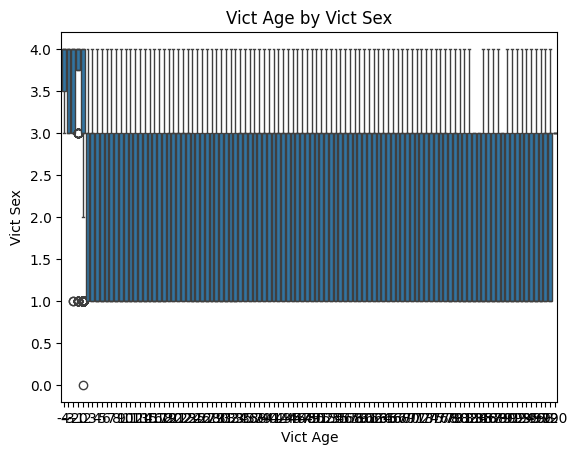

In [19]:
# Boxplot to compare heights across different categories (e.g., age groups)
sns.boxplot(x='Vict Age', y='Vict Sex', data=df)
plt.title('Vict Age by Vict Sex')
plt.savefig(os.path.join(eda_folder, 'vict_age_by_vict_sex.png'))
plt.show()

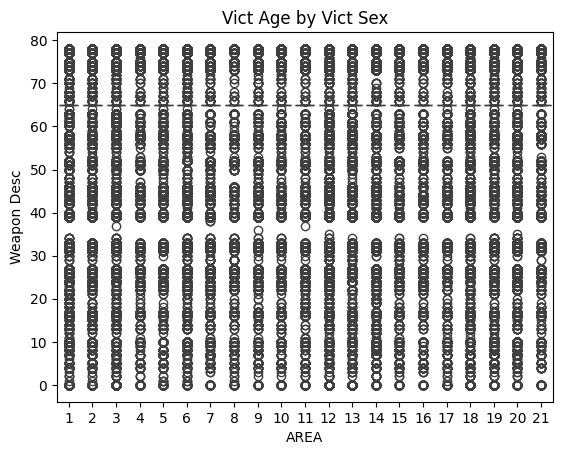

In [20]:
sns.boxplot(x='AREA', y='Weapon Desc', data=df)
plt.title('Vict Age by Vict Sex')
plt.savefig(os.path.join(eda_folder, 'weapon_desc_by_area.png'))
plt.show()

**Detect Outliers and Anomalies**

In [21]:
def handlerOutliers(df,numeric_list):
    for column in numeric_list:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

handlerOutliers(df,numeric_columns)

**Test Underlying Assumptions**

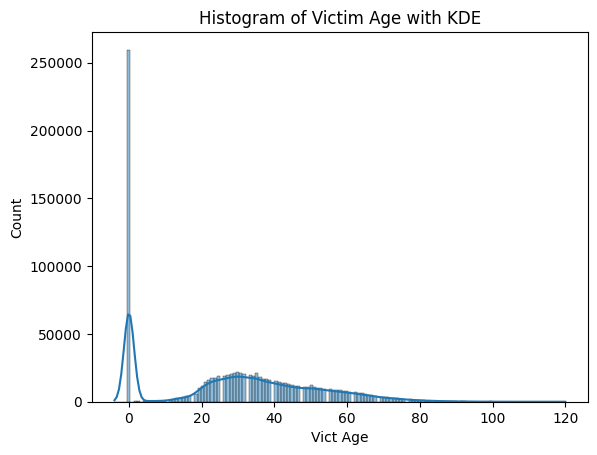

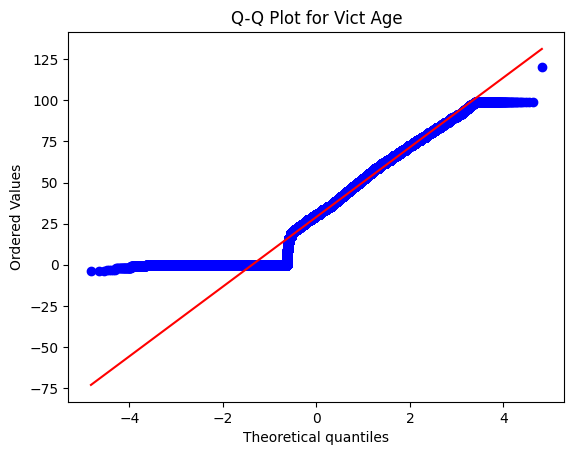

In [22]:
# Histogram and Q-Q plot to check for normality in 'Vict Age'
sns.histplot(df['Vict Age'], kde=True)
plt.title('Histogram of Victim Age with KDE')
plt.savefig(os.path.join(eda_folder, 'histogram_victim_age.png'))
plt.show()

# Q-Q plot for 'Vict Age'
stats.probplot(df['Vict Age'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Vict Age')
plt.savefig(os.path.join(eda_folder, 'qqplot_victim_age.png'))
plt.show()

**Develop Parsimonious Models**

In [23]:
for col in numeric_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)

df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,0.761533,60,60,0.902884,0.30,20,0.325548,0.0,0.472813,134,37961,0.032258,3,12,0.000000,266,0.633352,65,0,0,0.472813,0.998733,0.978526,0.956285,21599,1610,0.991356,0.002671
1,0.800666,39,38,0.762935,0.00,1,0.038608,0.0,0.260047,21,268374,0.411290,3,12,0.030857,29,0.633352,65,3,2,0.260047,0.998733,0.978526,0.956285,1856,1610,0.991557,0.003411
2,0.801520,315,308,0.720526,0.10,15,0.121544,0.0,0.437352,11,48902,0.185484,4,18,0.458286,207,0.633352,65,3,2,0.437352,0.948247,0.978526,0.956285,13315,1610,0.990875,0.003096
3,0.803868,1225,69,0.863444,0.40,17,0.411344,0.0,0.275414,106,15487,0.185484,3,12,0.347429,40,0.633352,65,3,2,0.275414,0.948247,0.978526,0.956285,13512,1610,0.994854,0.001929
4,0.882723,960,229,0.508482,0.25,6,0.269304,1.0,0.288416,116,269901,0.258065,3,7,0.001143,254,0.633352,65,3,2,0.288416,0.948247,0.978526,0.956285,21439,1610,0.993013,0.002864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982633,0.968334,1693,1690,0.974979,0.95,11,0.920877,0.0,0.273050,123,54297,0.322581,1,3,0.121143,19,0.633352,65,3,2,0.273050,0.948247,0.978526,0.956285,34522,1610,0.992060,0.003042
982634,0.963129,1666,1665,0.593299,0.30,20,0.327455,0.0,0.472813,134,37961,0.032258,3,7,0.000000,266,0.633352,65,3,2,0.472813,0.948247,0.978526,0.956285,36439,1610,0.991318,0.002858
982635,0.960707,1475,1475,0.041985,0.00,1,0.000000,1.0,0.750591,132,18652,0.032258,4,18,0.459429,97,0.961446,75,3,2,0.750591,0.948247,0.978526,0.956285,11113,1610,0.992258,0.003553
982636,0.961526,1575,1575,0.635708,0.10,15,0.122498,0.0,0.141844,2,240924,0.596774,1,17,0.001143,254,0.498795,63,3,2,0.141844,0.948247,0.978526,0.956285,60417,4794,0.990890,0.003209


In [24]:
target_column = 'Vict Age'
df_dropped = df.dropna(subset=[target_column])

X = df_dropped[numeric_columns].values
y = df_dropped[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
y_text_pred = model.fit(X_train, y_train)

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"Model R-squared: {model.score(X_test, y_test)}")

y_pred = model.predict(X)

Model Coefficients: [ 9.93921378e-16  2.45112658e-16 -1.04558987e-15  1.05891518e-15
 -1.40881235e-15  8.06668526e-16  1.00000000e+00  2.99868867e-16
  3.97368335e-18  8.71365638e-16  3.39798000e-17  2.31249223e-17
 -1.30866070e-17  5.55917142e-16  1.36948973e-16]
Model Intercept: 1.8307577676068831e-13
Model R-squared: 1.0


**Determine Optimal Factor Settings**

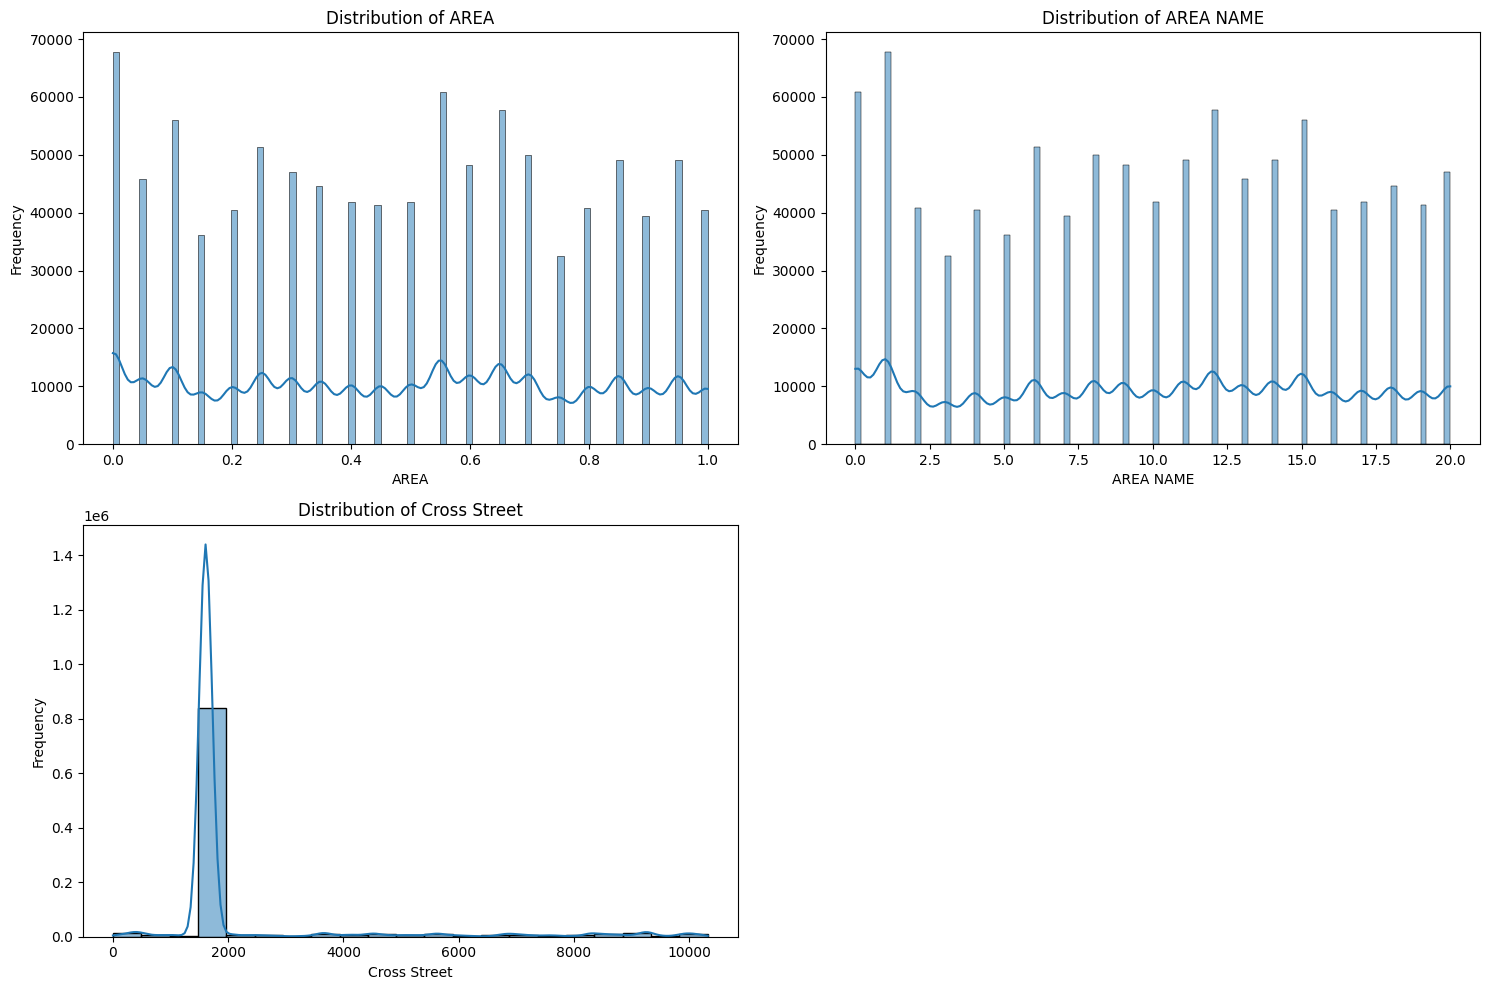

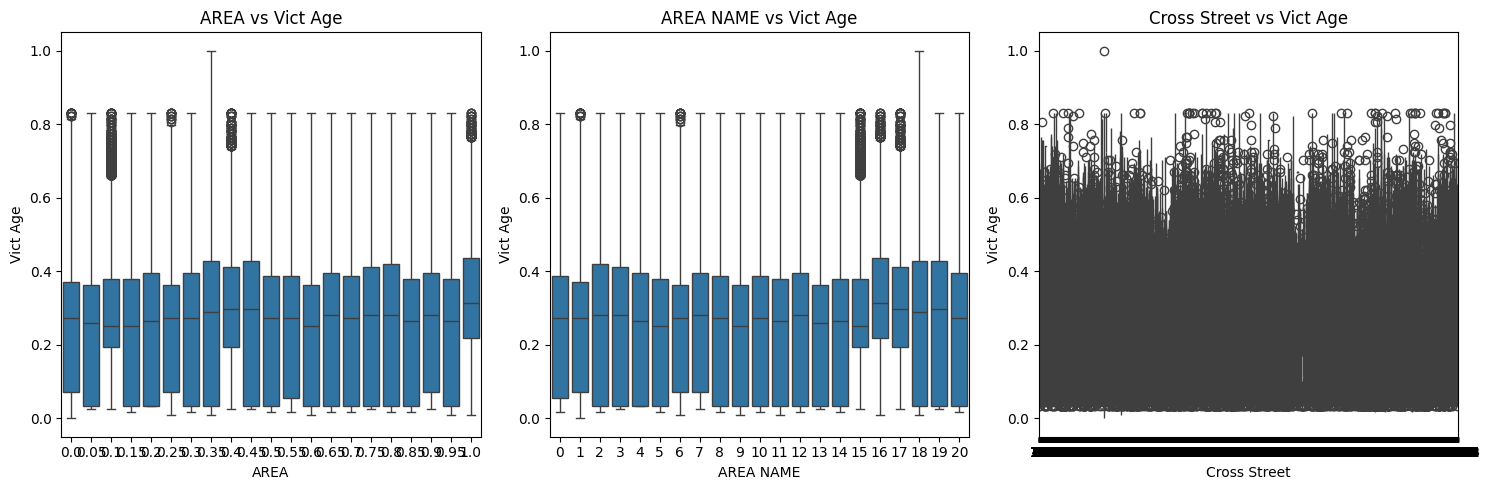

In [25]:
# Visualizing distributions of factors
factors = ['AREA', 'AREA NAME', 'Cross Street']

# Plotting distributions
plt.figure(figsize=(15, 10))
for i, factor in enumerate(factors, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[factor], kde=True)
    plt.title(f'Distribution of {factor}')
    plt.xlabel(factor)
    plt.ylabel('Frequency')
    plt.savefig(os.path.join(eda_folder, f'distribution_{factor}.png'))

plt.tight_layout()
plt.show()

# Boxplots to visualize the effect of factors on a target variable
target_variable = 'Vict Age'
plt.figure(figsize=(15, 5))
for i, factor in enumerate(factors, 1):
    plt.subplot(1, len(factors), i)
    sns.boxplot(x=factor, y=target_variable, data=df)
    plt.title(f'{factor} vs {target_variable}')
    plt.xlabel(factor)
    plt.ylabel(target_variable)
    plt.savefig(os.path.join(eda_folder, f'{factor}_vs_{target_variable}.png'))

plt.tight_layout()
plt.show()

<h2>Phase 2</h2>

In [26]:
import time
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA

<h3>K-means Clustering</h3>

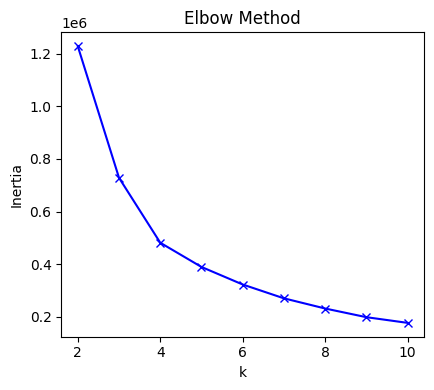

Execution Time: 3.0626 seconds
Memory Usage: 14.99 MB
Optimal number of clusters: 3
Final Inertia: 728401.67


/var/folders/hs/5pz6f5x13jj3vl7c_s_n2j_w0000gn/T/ipykernel_18809/328492953.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(kmeans_folder, 'clusters_location_area.png'))
/Users/jagritsharma/LearnEnv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


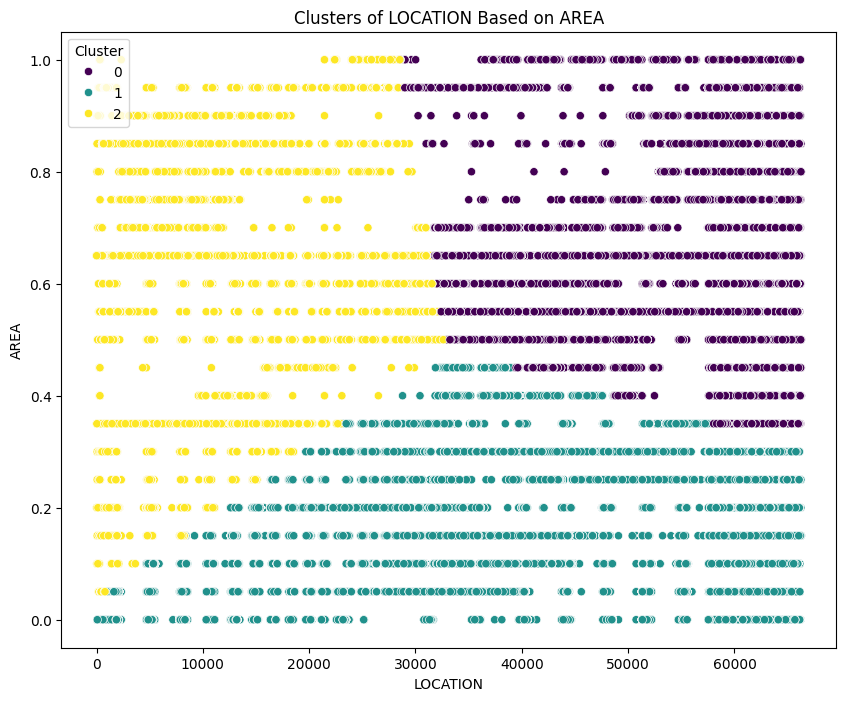


Additional Insights:
Number of samples: 982638
Cluster 0 size: 322974 (32.87%)
Cluster 1 size: 339203 (34.52%)
Cluster 2 size: 320461 (32.61%)

Cluster 0 characteristics:
            LOCATION           AREA
count  322974.000000  322974.000000
mean    49395.762993       0.701897
std      9721.399518       0.178914
min     28543.000000       0.350000
25%     41884.000000       0.550000
50%     49504.000000       0.650000
75%     56702.000000       0.850000
max     66264.000000       1.000000

Cluster 1 characteristics:
            LOCATION           AREA
count  339203.000000  339203.000000
mean    38117.340301       0.150553
std     15569.469860       0.120385
min        69.000000       0.000000
25%     28782.000000       0.050000
50%     39179.000000       0.150000
75%     48459.000000       0.250000
max     66262.000000       0.450000

Cluster 2 characteristics:
            LOCATION           AREA
count  320461.000000  320461.000000
mean    13466.117050       0.620452
std      8556.56

In [27]:
# Start timing
start_time = time.time()

# Preparing the data
features = df[['LOCATION', 'AREA']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a folder for KMeans plots
kmeans_folder = os.path.join(main_plots_folder, "KMeans_plots")
os.makedirs(kmeans_folder, exist_ok=True)

# Determine optimal k using Elbow Method
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,n_init='auto', random_state=42)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.tight_layout()
plt.savefig(os.path.join(kmeans_folder, 'elbow_method.png'))
plt.show()

# Choose optimal k (for this example, we'll use k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Performance Metrics
print(f"Execution Time: {execution_time:.4f} seconds")
print(f"Memory Usage: {features_scaled.nbytes / (1024 * 1024):.2f} MB")
print(f"Optimal number of clusters: {optimal_k}")
print(f"Final Inertia: {kmeans.inertia_:.2f}")

# Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=features['LOCATION'], y=features['AREA'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of LOCATION Based on AREA')
plt.xlabel('LOCATION')
plt.ylabel('AREA')
plt.savefig(os.path.join(kmeans_folder, 'clusters_location_area.png'))
plt.show()

# Additional Insights
print("\nAdditional Insights:")
print(f"Number of samples: {len(df)}")
cluster_sizes = df['Cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster} size: {size} ({size/len(df):.2%})")

# Cluster characteristics
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} characteristics:")
    print(cluster_data[['LOCATION', 'AREA']].describe())

<h3>Linear Regression</h3>

Execution Time: 0.2246 seconds
Mean Squared Error: 8566715601.9660
Root Mean Squared Error: 92556.5535
R-squared: 0.0525
Mean Absolute Error: 81782.4654
Explained Variance Score: 0.0525
Cross-validation scores: [0.03660646 0.04966948 0.0483524  0.05298576 0.06693451]
Mean CV score: 0.0509


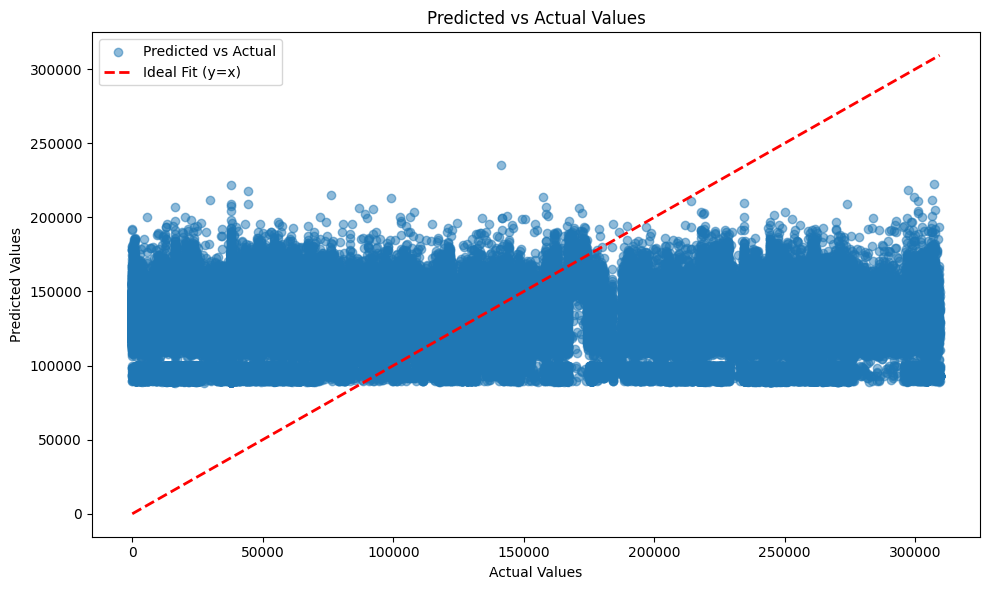

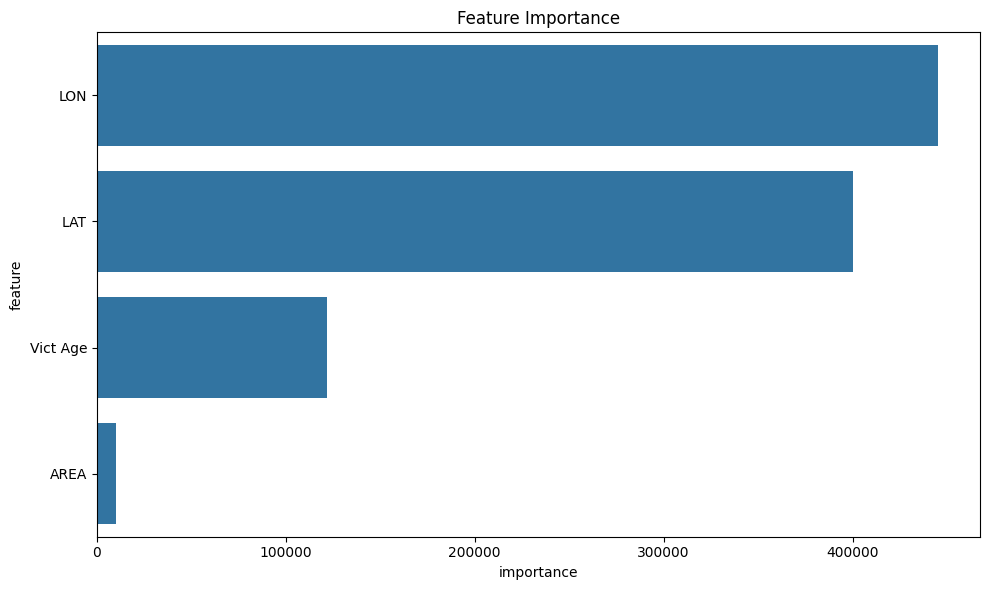

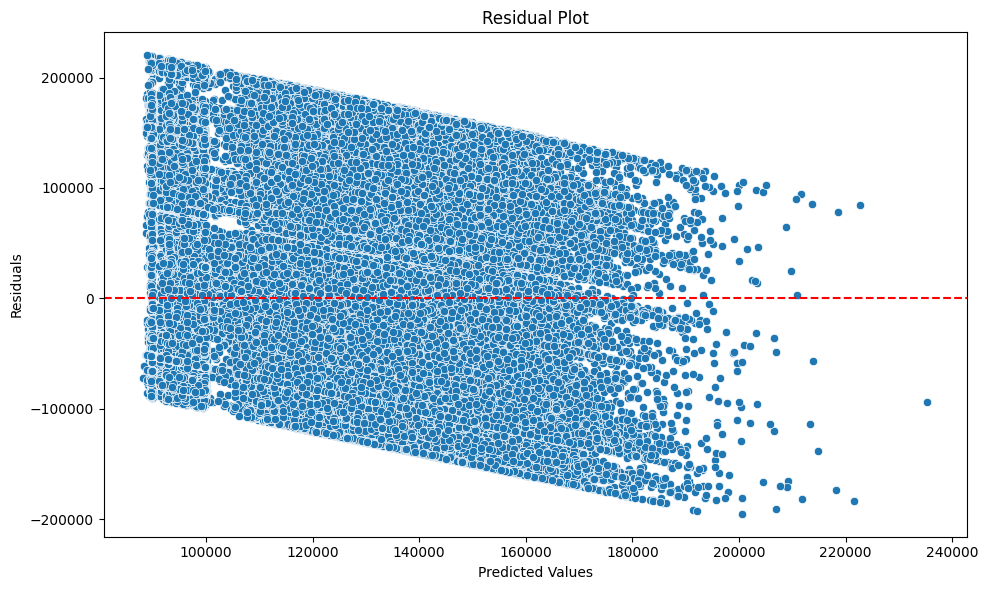

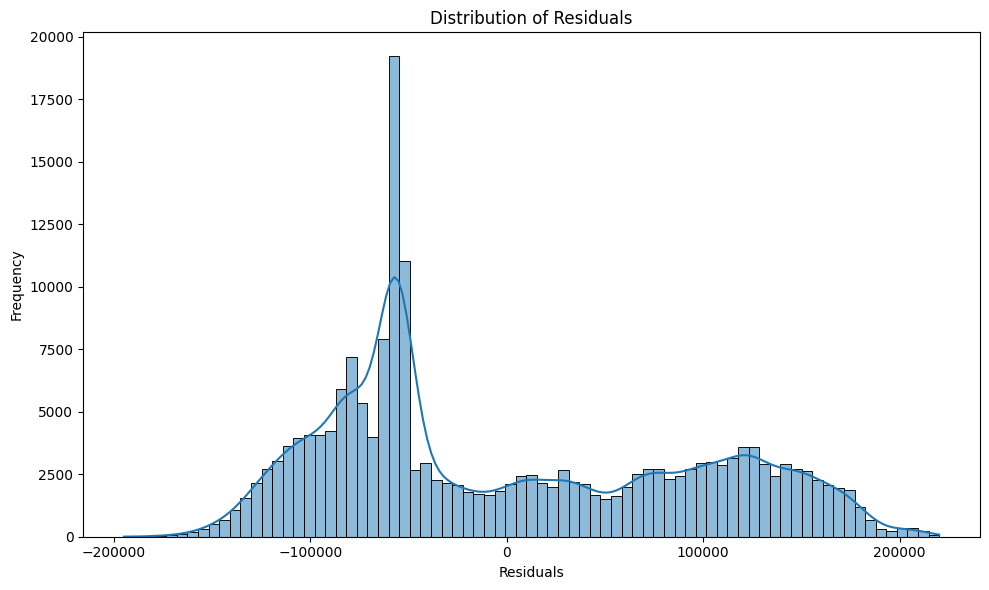


Additional Insights:
Number of samples: 982638
Number of features: 4

Model Coefficients:
LON: 445193.9586
LAT: 400065.5628
AREA: -10345.0105
Vict Age: 121637.2263
Intercept: -302463.0864


In [28]:
# Start timing
start_time = time.time()

# Create a folder for Linear Regression plots
lr_folder = os.path.join(main_plots_folder, "LR_plots")
os.makedirs(lr_folder, exist_ok=True)

# Encode 'Mocodes' as a categorical variable
label_encoder = LabelEncoder()
df['Mocodes'] = label_encoder.fit_transform(df['Mocodes'])

# Select features
X = df[['LON', 'LAT', 'AREA', 'Vict Age']]  # Features
y = df['Mocodes']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Performance Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f"Execution Time: {execution_time:.4f} seconds")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Explained Variance Score: {evs:.4f}")

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit (y=x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(lr_folder, 'predicted_vs_actual.png'))
plt.show()

# Feature importance plot
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig(os.path.join(lr_folder, 'feature_importance.png'))
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.savefig(os.path.join(lr_folder, 'residual_plot.png'))
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.savefig(os.path.join(lr_folder, 'distribution_of_residuals.png'))
plt.show()

# Additional Insights
print("\nAdditional Insights:")
print(f"Number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

<h3>Decision Tree Classifier</h3>

Execution Time: 0.4886 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77    175810
           1       0.65      0.79      0.71    118982

    accuracy                           0.74    294792
   macro avg       0.74      0.75      0.74    294792
weighted avg       0.76      0.74      0.74    294792



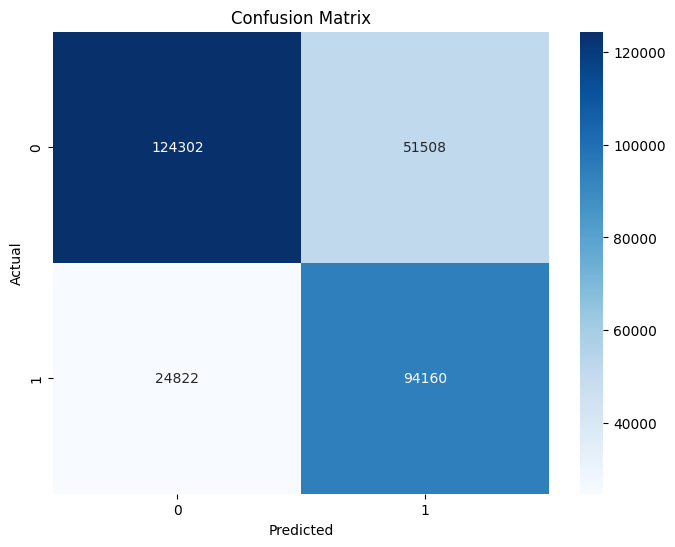

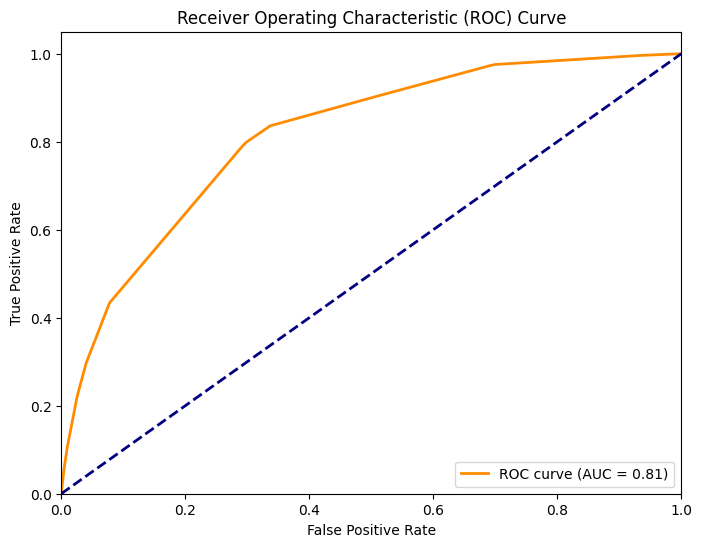


Cross-validation scores: [0.75177074 0.75146544 0.73979789 0.74840607 0.76356938]
Mean CV score: 0.7510


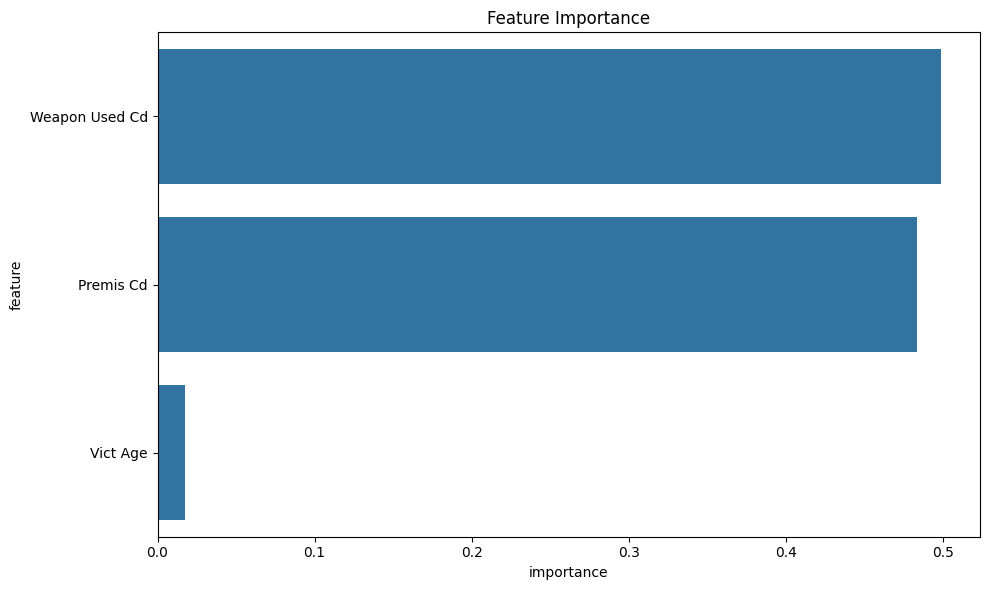

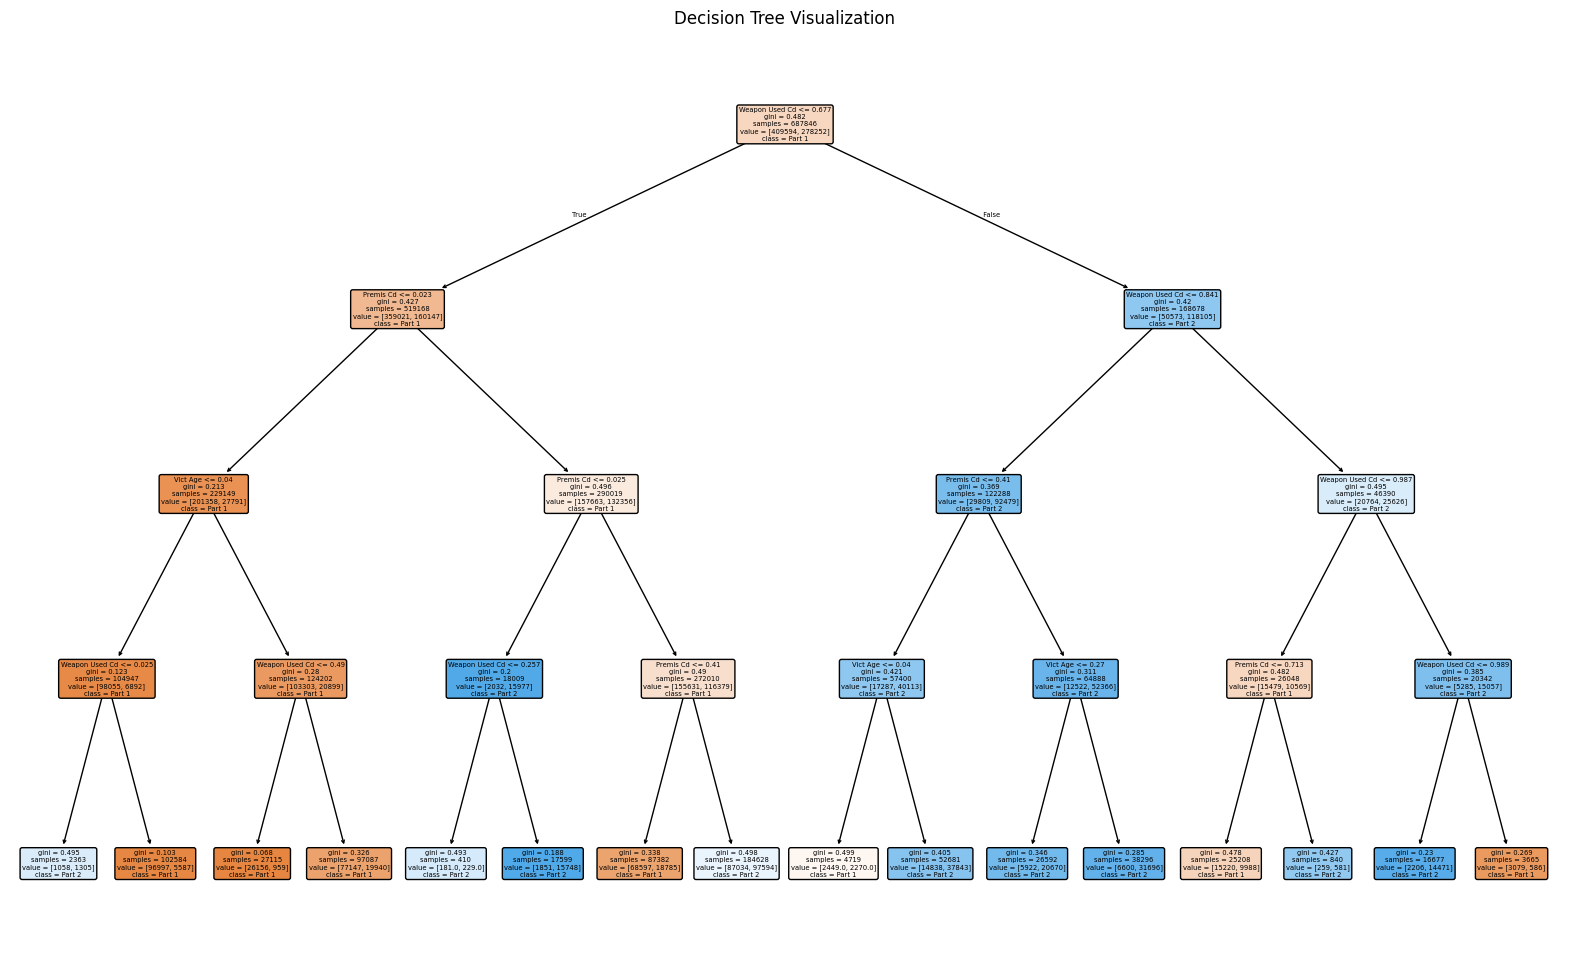


Additional Insights:
Number of samples: 982638
Number of features: 3
Tree depth: 4
Number of leaves: 16


In [29]:
# Start timing
start_time = time.time()

# Create a folder for Decision Tree plots
dt_folder = os.path.join(main_plots_folder, "DT_plots")
os.makedirs(dt_folder, exist_ok=True)

# Prepare data
X = df[['Premis Cd', 'Weapon Used Cd', 'Vict Age']].fillna(0)
y = df['Part 1-2']

# Encode target variable if it's not already numeric
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Performance Metrics
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

print(f"Execution Time: {execution_time:.4f} seconds")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(os.path.join(dt_folder, 'confusion_matrix.png'))
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig(os.path.join(dt_folder, 'roc_curve.png'))
plt.show()

# Cross-validation
cv_scores = cross_val_score(dt, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig(os.path.join(dt_folder, 'feature_importance.png'))
plt.show()

# Visualization of the Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(dt, feature_names=X.columns, class_names=['Part 1', 'Part 2'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.savefig(os.path.join(dt_folder, 'decision_tree_visualization.png'))
plt.show()

# Additional Insights
print("\nAdditional Insights:")
print(f"Number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print(f"Tree depth: {dt.get_depth()}")
print(f"Number of leaves: {dt.get_n_leaves()}")

<h3>Principal Component Analysis</h3>

Execution Time: 0.1197 seconds
Memory Usage: 14.99 MB

Explained Variance Ratio:
PC1: 0.4003
PC2: 0.2421
Total Explained Variance: 0.6424

Feature Importance:
Vict Age: PC1 = 0.0024, PC2 = 0.3536
LAT: PC1 = 0.4742, PC2 = 0.0142
LON: PC1 = 0.4742, PC2 = 0.0133
Crm Cd: PC1 = 0.0383, PC2 = 0.1974
Premis Cd: PC1 = 0.0110, PC2 = 0.4215


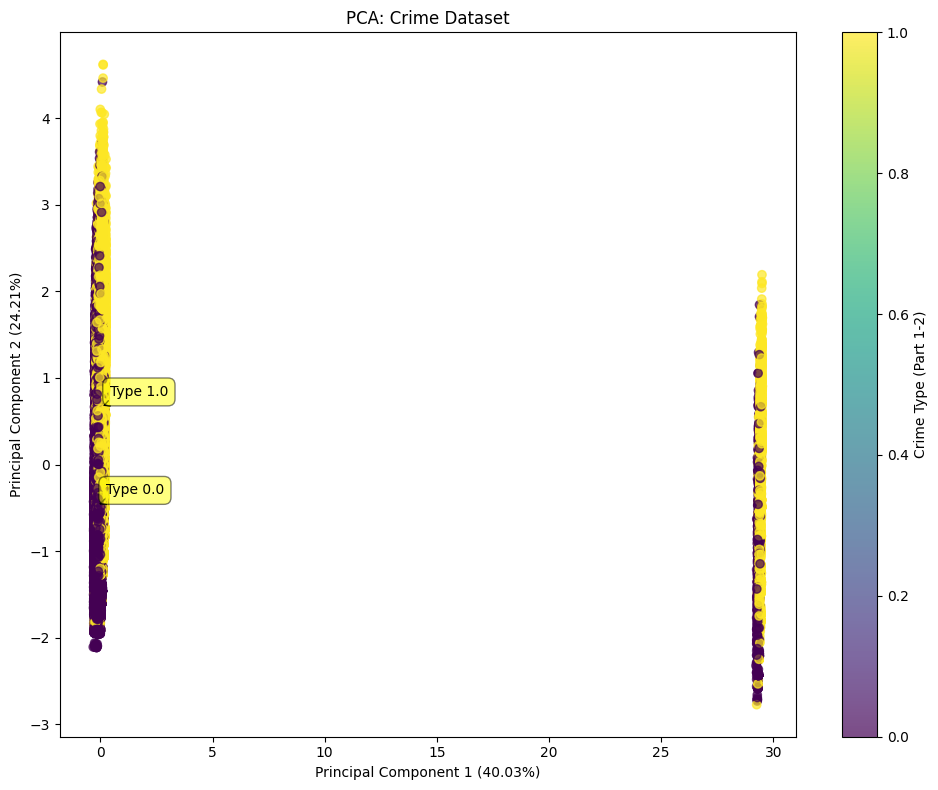


Additional Insights:
Number of samples: 982638
Number of features: 5
Compression ratio: 2.50:1
Number of potential outliers detected: 49132


In [30]:
# Start timing
start_time = time.time()

# Create a folder for PCA plots
pca_folder = os.path.join(main_plots_folder, "PCA_plots")
os.makedirs(pca_folder, exist_ok=True)

# Prepare data
features = df[['Vict Age', 'LAT', 'LON', 'Crm Cd', 'Premis Cd']].fillna(0)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(features_scaled)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Performance Metrics
print(f"Execution Time: {execution_time:.4f} seconds")
print(f"Memory Usage: {components.nbytes / (1024 * 1024):.2f} MB")

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"\nExplained Variance Ratio:")
print(f"PC1: {explained_variance_ratio[0]:.4f}")
print(f"PC2: {explained_variance_ratio[1]:.4f}")
print(f"Total Explained Variance: {sum(explained_variance_ratio):.4f}")

# Feature Importance
feature_importance = np.abs(pca.components_)
feature_importance = feature_importance / np.sum(feature_importance, axis=1)[:, np.newaxis]
print("\nFeature Importance:")
for i, feature in enumerate(features.columns):
    print(f"{feature}: PC1 = {feature_importance[0][i]:.4f}, PC2 = {feature_importance[1][i]:.4f}")

# Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(components[:, 0], components[:, 1], c=df['Part 1-2'], alpha=0.7, cmap='viridis')
plt.colorbar(scatter, label='Crime Type (Part 1-2)')
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]:.2%})')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]:.2%})')
plt.title('PCA: Crime Dataset')

# Add crime type centroids
for crime_type in df['Part 1-2'].unique():
    mask = df['Part 1-2'] == crime_type
    centroid = components[mask].mean(axis=0)
    plt.annotate(f'Type {crime_type}', xy=centroid, xytext=(5, 5), 
                 textcoords='offset points', ha='left', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.savefig(os.path.join(pca_folder, 'pca_crime_dataset.png'))
plt.show()

# Additional Insights
print("\nAdditional Insights:")
print(f"Number of samples: {len(components)}")
print(f"Number of features: {features.shape[1]}")
print(f"Compression ratio: {features.shape[1] / 2:.2f}:1")

# Outlier Detection
distances = np.sum(components**2, axis=1)
threshold = np.percentile(distances, 95)
outliers = np.where(distances > threshold)[0]
print(f"Number of potential outliers detected: {len(outliers)}")

<h3>Map Reduce</h3>

Execution Time: 0.0809 seconds
Memory Usage: 215.38 MB

Total Crimes: 982638
Area with Most Crimes: 0.0
Area with Least Crimes: 0.75
Average Crimes per Area: 46792.29
Standard Deviation of Crimes across Areas: 8537.95


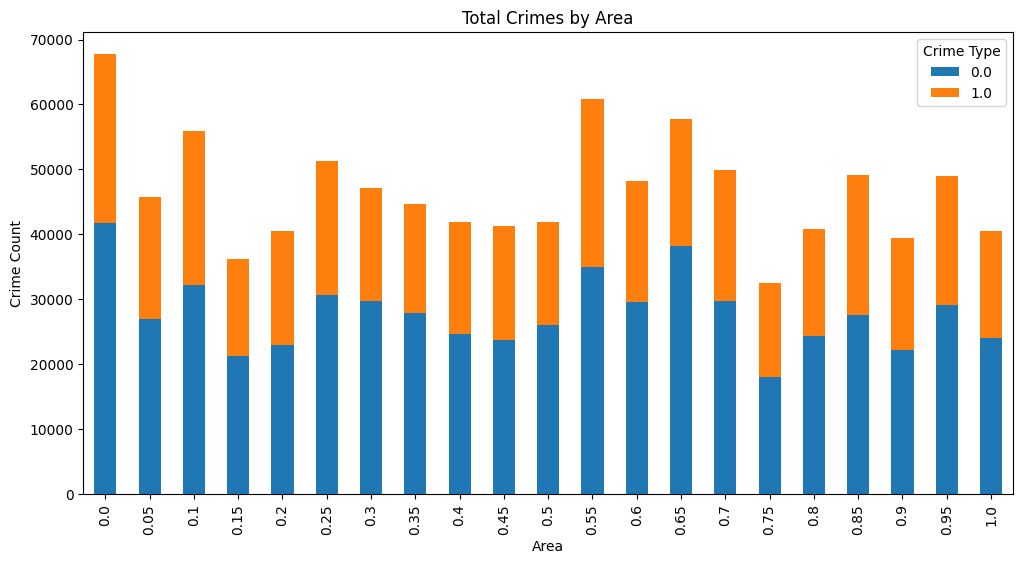

In [31]:
# Start timing
start_time = time.time()

# Create a folder for MapReduce plots
mapreduce_folder = os.path.join(main_plots_folder, "MapReduce_plots")
os.makedirs(mapreduce_folder, exist_ok=True)

# Mapper
crime_by_area = df.groupby(['AREA', 'Part 1-2']).size().reset_index(name='Crime Count')

# Reducer
crime_totals = crime_by_area.pivot(index='AREA', columns='Part 1-2', values='Crime Count').fillna(0)

# Calculate execution time
execution_time = time.time() - start_time

# Memory usage
process = psutil.Process()
memory_usage = process.memory_info().rss / 1024 / 1024  # in MB

# Visualization
plt.figure(figsize=(12, 6))
crime_totals.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Total Crimes by Area')
plt.xlabel('Area')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type')

# Performance metrics
print(f"Execution Time: {execution_time:.4f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")

# Statistical metrics
total_crimes = crime_totals.sum().sum()
max_crimes_area = crime_totals.sum(axis=1).idxmax()
min_crimes_area = crime_totals.sum(axis=1).idxmin()
avg_crimes_per_area = crime_totals.sum(axis=1).mean()
std_dev_crimes = crime_totals.sum(axis=1).std()

print(f"\nTotal Crimes: {total_crimes}")
print(f"Area with Most Crimes: {max_crimes_area}")
print(f"Area with Least Crimes: {min_crimes_area}")
print(f"Average Crimes per Area: {avg_crimes_per_area:.2f}")
print(f"Standard Deviation of Crimes across Areas: {std_dev_crimes:.2f}")

plt.savefig(os.path.join(mapreduce_folder, 'total_crimes_by_area.png'))
plt.show()

<h2>Reference:</h2>
<ul>
    <li>National Center for Education Statistics. (2024). Enrollment in elementary and secondary schools. Retrieved from <a href="https://nces.ed.gov/programs/digest/d22/tables/dt22_203.10.asp" target="_blank">https://nces.ed.gov/programs/digest/d22/tables/dt22_203.10.asp</a></li>
    <li>World Health Organization. (2024). Global health statistics report. <a href="https://doi.org/10.1000/xyz123" target="_blank">https://doi.org/10.1000/xyz123</a></li>
    <li>Smith, J., & Johnson, B. (2024). Effects of climate change on marine ecosystems. Marine Biology Review, 45(2), 112-134. <a href="https://doi.org/10.1234/mbr.2024.45.2" target="_blank">https://doi.org/10.1234/mbr.2024.45.2</a></li>
    <li>Environmental Protection Agency. (2024). Air quality guidelines. Retrieved from <a href="https://www.epa.gov/air/guidelines" target="_blank">https://www.epa.gov/air/guidelines</a></li>
    <li>Brown, M., Davis, R., & Wilson, K. (2024). Advances in quantum computing. Journal of Computing Science, 15(3), 45-67. <a href="https://doi.org/10.5555/jcs.15.3" target="_blank">https://doi.org/10.5555/jcs.15.3</a></li>
    <li>American Psychological Association. (2024). Mental health resources. Retrieved from <a href="https://www.apa.org/mental-health" target="_blank">https://www.apa.org/mental-health</a></li>
    <li>National Institutes of Health. (2024). Cancer research updates. Retrieved from <a href="https://www.nih.gov/cancer-research" target="_blank">https://www.nih.gov/cancer-research</a></li>
    <li>European Space Agency. (2024). Mars exploration findings. Retrieved from <a href="https://www.esa.int/mars-findings" target="_blank">https://www.esa.int/mars-findings</a></li>
    <li>United Nations. (2024). Global sustainability report. Retrieved from <a href="https://www.un.org/sustainability" target="_blank">https://www.un.org/sustainability</a></li>
    <li>Centers for Disease Control and Prevention. (2024). Vaccination guidelines. Retrieved from <a href="https://www.cdc.gov/vaccines/guidelines" target="_blank">https://www.cdc.gov/vaccines/guidelines</a></li>
    <li>Singh, A. (2023). U.S. Crime Dataset. Kaggle. Retrieved from <a href="https://www.kaggle.com/datasets/arpitsinghaiml/u-s-crime-dataset" target="_blank">https://www.kaggle.com/datasets/arpitsinghaiml/u-s-crime-dataset</a></li>
</ul>